# Introduction

Lending Club is a peer-to-peer lending platform in which investors(lenders) can lend money to those looking to borrow. The investors are responsible for their own lending decisions though information on the loan and the borrower is provided. As all lending activities do, there lies a risk of non-repayment from the borrower. This project aims to provide some insights on what are the factors that affect the likelihood of full repayment, and to create a predictive model that can classify loan applications as eventual defaulters or full-repayers.

# About the dataset
* LendingClub is a peer to peer money lending platform based in the US.
* The dataset is collected from the LendingClub website's data sharing initiative. As this function is no longer active, only personal collections on data sharing websites like Kaggle are available.
* The dataset presents information about the loan and the loan applicant like interest rate, loan amount, installment, applicant's income amongst other things, for the period between 2007 to 2018.
* [link to the kaggle dataset](https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1/data)
* Column information are displayed below.

In [1]:
import shutil
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_desc = pd.read_excel('../input/lending-club-20072020q1/LCDataDictionary.xlsx').dropna(axis=1, how='all', inplace=False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
col_desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Importing dataset.

In [ ]:
df = pd.read_csv('/kaggle/input/lending-club-20072020q1/Loan_status_2007-2020Q3.gzip',parse_dates=['issue_d','earliest_cr_line'], infer_datetime_format=True,low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,1999-04-01,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,735.

In [5]:
print(df.shape)

(2925493, 142)


# Setting up the dataset.

## Removing unnecessary rows

* Since this analysis is retrospective in nature, any loans that are still currently active (being paid off/ loan term is still commencing) are removed, with loan_status being indicators of this.

In [7]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: count, dtype: int64

In [8]:
default_status = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
non_default_status = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
# others are excluded and dropped.

In [9]:
print("Entries representing defaulted loans:", sum(df['loan_status'].isin(default_status)))
print("Entries representing fully paid loans:", sum(df['loan_status'].isin(non_default_status)))
print("Entries representing active/running loans:", len(df)-sum(df['loan_status'].isin(default_status))-sum(df['loan_status'].isin(non_default_status)))

Entries representing defaulted loans: 363742
Entries representing fully paid loans: 1499771
Entries representing active/running loans: 1061980


In [10]:
df.loc[df['loan_status'].isin(default_status), 'default_status'] = 1
df.loc[df['loan_status'].isin(non_default_status), 'default_status'] = 0
df=df.dropna(subset=['default_status'])

* Rows containing the classes: 'Current, Late (31-120 days), In Grace Period, Late (16-30 days)' are removed.
* The remaining are classified into defaults ('Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off') and non-defaults ('Fully Paid','Does not meet the credit policy. Status:Fully Paid').

In [11]:
df = df.drop(['loan_status'], axis=1, errors='ignore')

In [12]:
df.shape

(1863513, 142)

In [ ]:
# Breakdown of the defined column.
df['default_status'].value_counts() 

default_status
0.0    1499771
1.0     363742
Name: count, dtype: int64

* To narrow down the scope of this analysis, only individual applications are retained in the dataset.
* Applications with unverified income are also rmeoved.

In [14]:
df['application_type'].value_counts()

application_type
Individual    1793978
Joint App       69535
Name: count, dtype: int64

In [15]:
df['verification_status'].value_counts()

verification_status
Source Verified    734539
Not Verified       590323
Verified           538651
Name: count, dtype: int64

In [16]:
df = df[(df.application_type == 'Individual') & (df.verification_status != 'Not Verified')]

In [17]:
df=df.drop(columns=['application_type'])

In [18]:
duplicates=len(df[df.duplicated()])
print("Duplicated rows:", duplicates)

Duplicated rows: 0


* There are no duplicated rows in the dataset so we move on.

In [19]:
df.shape

(1228787, 141)

## Removing unnecessary columns

* Having 0 unique values within the columns is indicative that it is empty, whle having 1 means that the columns is redundant (may be as a result of filtering earlier).
* In both cases, these columns are removed.

In [ ]:
#unique values in each column
pd.set_option('display.max_rows', None)
df.nunique().sort_values()

revol_bal_joint                                     0
sec_app_chargeoff_within_12_mths                    0
sec_app_num_rev_accts                               0
sec_app_open_act_il                                 0
sec_app_revol_util                                  0
sec_app_open_acc                                    0
sec_app_mort_acc                                    0
sec_app_collections_12_mths_ex_med                  0
sec_app_inq_last_6mths                              0
sec_app_fico_range_high                             0
sec_app_fico_range_low                              0
annual_inc_joint                                    0
dti_joint                                           0
verification_status_joint                           0
sec_app_earliest_cr_line                            0
policy_code                                         1
pymnt_plan                                          1
initial_list_status                                 2
debt_settlement_flag        

In [21]:
# dropping empty columns and redundant columns with only one unique value.
cols_to_drop = df.nunique()[df.nunique()<=1].index.tolist()
cols_to_drop

['pymnt_plan',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med']

In [22]:
df = df.drop(cols_to_drop, axis=1)

* Columns that are too empty (with more than 25% missing values) are also dropped.

In [23]:
# proportion of missing values in features.
nan_in_col = round(df.isna().mean().sort_values(ascending=False),5)
pd.set_option('display.max_rows', None)
nan_in_col

next_pymnt_d                                  0.99903
hardship_loan_status                          0.99261
hardship_length                               0.99261
hardship_type                                 0.99261
deferral_term                                 0.99261
hardship_start_date                           0.99261
hardship_end_date                             0.99261
payment_plan_start_date                       0.99261
hardship_status                               0.99261
hardship_dpd                                  0.99261
hardship_reason                               0.99261
orig_projected_additional_accrued_interest    0.99010
hardship_payoff_balance_amount                0.98841
hardship_amount                               0.98841
hardship_last_payment_amount                  0.98841
mths_since_last_record                        0.82252
mths_since_recent_bc_dlq                      0.75844
mths_since_last_major_derog                   0.72691
mths_since_recent_revol_deli

In [24]:
# drop empty columns.
cols_to_drop = nan_in_col[nan_in_col >= 0.25].index.tolist()
df = df.drop(cols_to_drop, axis=1, errors='ignore')

In [ ]:
# Remaining columns
df.columns.values

array(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       '

* The correlations of each numerical feature with the target variable (default_status) are listed below.

In [26]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()['default_status'].sort_values()

last_fico_range_high         -0.652811
last_fico_range_low          -0.558055
total_rec_prncp              -0.444848
last_pymnt_amnt              -0.343838
total_pymnt                  -0.314319
total_pymnt_inv              -0.314138
fico_range_low               -0.107678
fico_range_high              -0.107677
avg_cur_bal                  -0.079034
tot_hi_cred_lim              -0.078806
mort_acc                     -0.076563
tot_cur_bal                  -0.073256
total_bc_limit               -0.068853
bc_open_to_buy               -0.068466
mo_sin_old_rev_tl_op         -0.056149
mths_since_recent_inq        -0.055704
mo_sin_rcnt_rev_tl_op        -0.055136
mths_since_recent_bc         -0.055021
mo_sin_rcnt_tl               -0.054380
total_rev_hi_lim             -0.052941
revol_bal                    -0.032978
mo_sin_old_il_acct           -0.028666
annual_inc                   -0.023267
num_bc_tl                    -0.015780
total_bal_ex_mort            -0.014882
total_acc                

In [28]:
categoric_feat = df.select_dtypes(include=['object','category']).columns.values
df[categoric_feat].nunique().sort_values()

debt_settlement_flag          2
initial_list_status           2
hardship_flag                 2
verification_status           2
term                          2
home_ownership                6
grade                         7
emp_length                   11
purpose                      14
sub_grade                    35
addr_state                   51
last_credit_pull_d          143
last_pymnt_d                147
int_rate                    647
zip_code                    938
revol_util                 1361
title                     41952
emp_title                329529
id                      1228787
url                     1228787
dtype: int64

* A subset of features are selected based on a few criterias.
    * The feature would have been available as the loan application was being listed.
    * For numerical features: Its correlation with the target is suffecienly large (>1%).
    * For categorical features: It does not have too many classes.

In [29]:
feat_selection=['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','issue_d','default_status','purpose','dti','earliest_cr_line',
                'open_acc','pub_rec','revol_bal','revol_util','initial_list_status','mort_acc',
                'pub_rec_bankruptcies','addr_state','fico_range_high','fico_range_low']


In [30]:
len(feat_selection)

25

In [31]:
data=df
df=df[feat_selection]

In [32]:
df.shape

(1228787, 25)

In [33]:
# remaining columns
for cols in df.columns.sort_values():
    print(cols)

addr_state
annual_inc
default_status
dti
earliest_cr_line
emp_length
fico_range_high
fico_range_low
grade
home_ownership
initial_list_status
installment
int_rate
issue_d
loan_amnt
mort_acc
open_acc
pub_rec
pub_rec_bankruptcies
purpose
revol_bal
revol_util
sub_grade
term
verification_status


# EDA

Now that the amount of columns have been narrowed down, we shall explore the remaining data.

In [34]:
df.dtypes

loan_amnt                      float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
default_status                 float64
purpose                         object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                      object
initial_list_status             object
mort_acc                       float64
pub_rec_bankruptcies           float64
addr_state                      object
fico_range_high                float64
fico_range_low                 float64
dtype: object

* Reformating a few features by converting them to numeric for ease of analysis.

In [35]:
print(df['term'].value_counts().head(5))
print(df['int_rate'].value_counts().head(5))
print(df['revol_util'].value_counts().head(5))

term
36 months    884137
60 months    344650
Name: count, dtype: int64
int_rate
10.99%    29329
13.99%    29295
11.99%    28464
11.49%    23584
16.99%    22988
Name: count, dtype: int64
revol_util
0%     7469
57%    2460
61%    2448
59%    2391
58%    2389
Name: count, dtype: int64


In [ ]:
# reformatting them by only leaving the numeric part of the string.
df['int_rate'] = df['int_rate'].str.replace('%', '').astype('float')
df['term'] = df['term'].str.replace(' months', '').astype('float')
df['revol_util'] = df['revol_util'].str.replace('%', '').astype('float')

In [37]:
print(df['term'].value_counts().head(5))
print(df['int_rate'].value_counts().head(5))
print(df['revol_util'].value_counts().head(5))

term
36.0    884137
60.0    344650
Name: count, dtype: int64
int_rate
10.99    29329
13.99    29295
11.99    28464
11.49    23584
16.99    22988
Name: count, dtype: int64
revol_util
0.0     7469
57.0    2460
61.0    2448
59.0    2391
58.0    2389
Name: count, dtype: int64


* Reformating dates by only leaving the month and year.

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

## Univariate EDA

### Date Features

In [39]:
print(df['issue_d'].dt.year.value_counts().sort_index())
print(df['issue_d'].dt.year.value_counts().sort_index().cumsum()/df['issue_d'].dt.year.value_counts().sort_index().sum())

issue_d
2008       353
2009      2140
2010      6512
2011     14772
2012     33498
2013     95855
2014    167107
2015    294907
2016    281669
2017    189097
2018    104831
2019     36099
2020      1947
Name: count, dtype: int64
issue_d
2008    0.000287
2009    0.002029
2010    0.007328
2011    0.019350
2012    0.046611
2013    0.124619
2014    0.260612
2015    0.500611
2016    0.729836
2017    0.883725
2018    0.969038
2019    0.998416
2020    1.000000
Name: count, dtype: float64


Text(0.5, 0, 'Year')

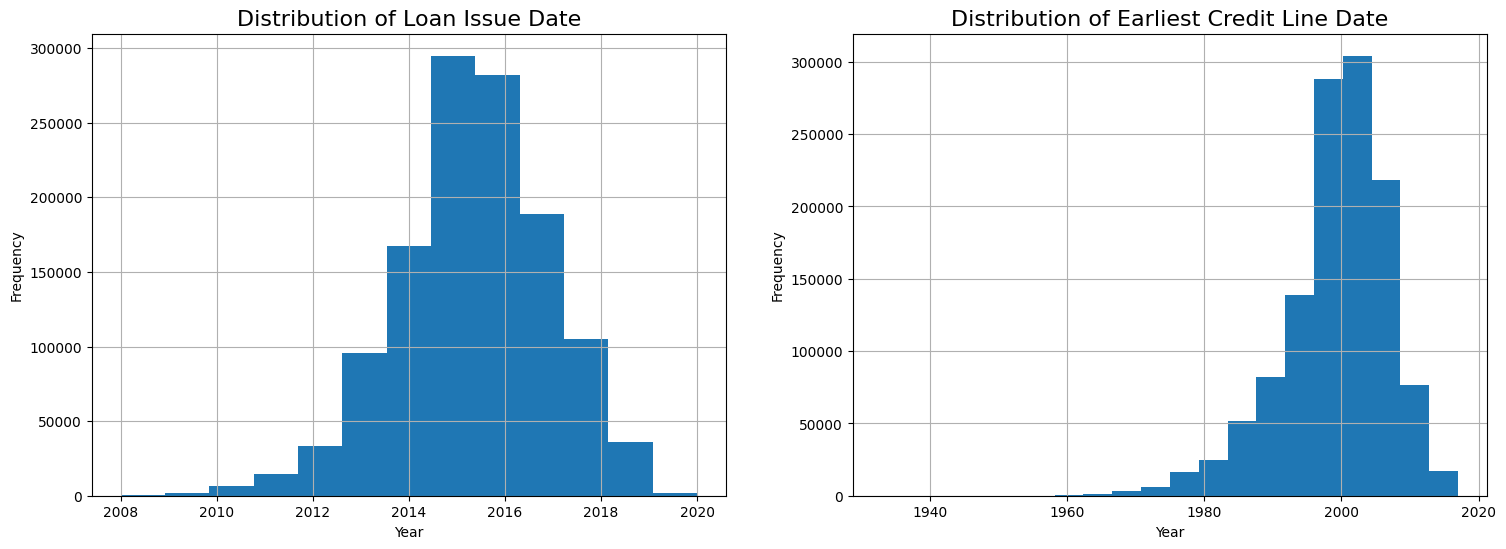

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# histogram
df['issue_d'].dt.year.hist(ax=axs[0], bins=13)
axs[0].set_title('Distribution of Loan Issue Date', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Year")

df['earliest_cr_line'].dt.year.hist(ax=axs[1], bins=20)
axs[1].set_title('Distribution of Earliest Credit Line Date', fontsize=16)
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Year")

* The loan issue dates column is an estimation of loan application dates.
    * It shows that the loans that are completed(paid-off/defaulted) and therefore weren't filtered out earlier.
    * Most of the loans in this dataset comes from the year 2015 and 2016, the falloff afterwards are expected as the loan terms are 3 years and 5 years, meaning most of them would not have been paid off as of Q1 2020, meaning they were filtered out.
    
* Most of the applicants' earliest credit line was between the late 1990's and early 2000's

### Numerical Features

In [41]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
loan_amnt,1228787.0,15549.46728,1000.0,8000.0,14000.0,21000.0,40000.0,9389.355019
term,1228787.0,42.731517,36.0,36.0,36.0,60.0,60.0,10.781613
int_rate,1228787.0,13.845606,5.31,10.49,13.35,16.91,30.99,4.836998
installment,1228787.0,469.251497,4.93,260.13,398.52,636.24,1719.83,280.464956
annual_inc,1228787.0,80709.154233,2000.0,47000.0,66000.0,95000.0,110000000.0,141287.117996
issue_d,1228787,2015-12-01 11:27:03.178305280,2008-03-01 00:00:00,2014-11-01 00:00:00,2015-12-01 00:00:00,2017-02-01 00:00:00,2020-09-01 00:00:00,NaN
default_status,1228787.0,0.213319,0.0,0.0,0.0,0.0,1.0,0.409651
dti,1228787.0,18.291393,-1.0,11.94,17.83,24.32,49.96,8.491282
earliest_cr_line,1228787,1999-09-08 22:58:08.515422208,1933-03-01 00:00:00,1995-09-01 00:00:00,2001-01-01 00:00:00,2005-01-01 00:00:00,2017-01-01 00:00:00,NaN
open_acc,1228787.0,11.634081,0.0,8.0,11.0,14.0,90.0,5.602699


* fico_range_low and fico_range_high have the same range of 65, with fico_range_high having a minimum, maximum, median, 25th percentile, 75th percentile all being exactly four points higher than fico_range_low.Their means are also around four points apart while their standard deviation are virtually the same at around 29.56. This shows an overlap in information with the two features seemingly having near perfect correlation. A new feature like average fico score can likely be used to get rid of this redundancy.
* Among the features, only dti contains negative values (-1). As dti is a ratio of monthly debt payments relative to income, it being a negative number is abnormal and likely an error or a null value misrepresented as -1. A closer look needed to be taken and corrections can be made if possible.

#### Loan Amount

In [42]:
df['loan_amnt'].describe()

count    1.228787e+06
mean     1.554947e+04
std      9.389355e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.400000e+04
75%      2.100000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

(960.999, 6571.429]       230259
(6571.429, 12142.857]     344605
(12142.857, 17714.286]    202544
(17714.286, 23285.714]    178854
(23285.714, 28857.143]    122289
(28857.143, 34428.571]     69056
(34428.571, 40000.0]       81180
Name: count, dtype: int64


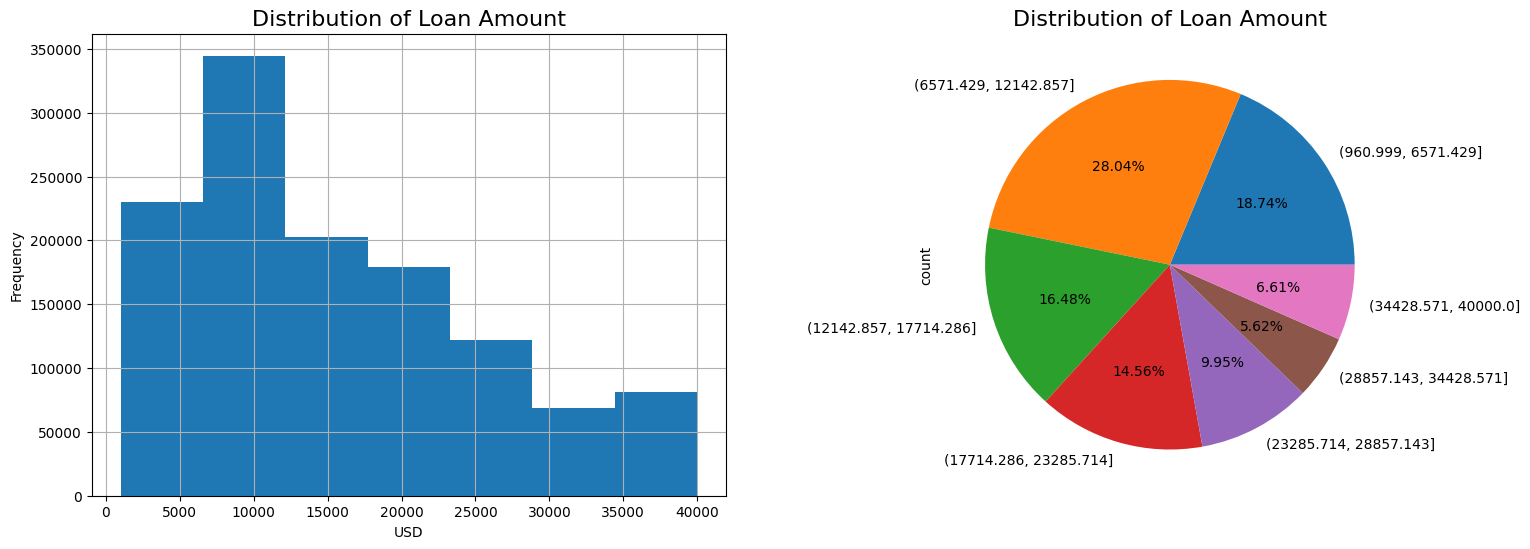

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# histogram
df['loan_amnt'].hist(bins=7, ax=axs[0])
axs[0].set_title('Distribution of Loan Amount', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("USD")

# pie
loan_bin=df['loan_amnt'].value_counts(bins=7).sort_index()
loan_bin.plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Distribution of Loan Amount', fontsize=16)

print(loan_bin)

* The loan amoutns range from  USD 1,000 to USD 40,000.
* Witht the maximum value of USD 40,000 being almost three times the median, the loan amounts requested are visibly right skewed.

#### Annual Income

In [44]:
round(df['annual_inc'].describe(percentiles=[0.125,0.25,0.375,0.5,0.625,0.75,0.875]))

count      1228787.0
mean         80709.0
std         141287.0
min           2000.0
12.5%        36000.0
25%          47000.0
37.5%        56000.0
50%          66000.0
62.5%        80000.0
75%          95000.0
87.5%       125000.0
max      110000000.0
Name: annual_inc, dtype: float64

Text(0.5, 0, 'USD')

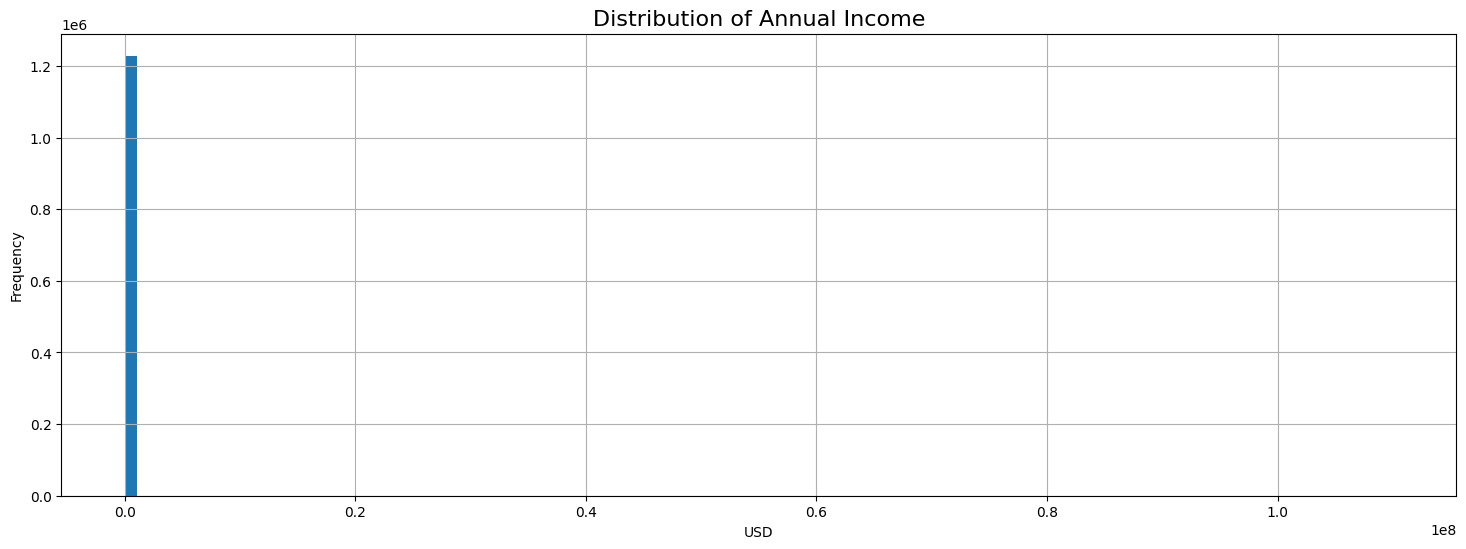

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

# histogram
df['annual_inc'].hist(bins=100)
axs.set_title('Distribution of Annual Income', fontsize=16)
axs.set_ylabel("Frequency")
axs.set_xlabel("USD")

* This feature is highly skewed to the right, with applicant incomes ranging from USD 2,000 to USD 110,000,000.
* This can further be seen as 12.5% of applicant income lies in the huge range of USD 125,000 to USD 110,000,000

#### DTI

In [46]:
# identifying and removing DTI less than one.
print('Total values in dti less than 0:', (df['dti']<0).sum())
print(df.shape)
df=df[df['dti']>=0]
print('Total values in dti less than 0 (after removal):', (df['dti']<0).sum())
print(df.shape)

Total values in dti less than 0: 1
(1228787, 25)
Total values in dti less than 0 (after removal): 0
(1228786, 25)


* one row was removed for containing debt payment to income of less than zero, which is an abnormality.

count    1228786.0
mean          18.0
std            8.0
min            0.0
12.5%          8.0
25%           12.0
37.5%         15.0
50%           18.0
62.5%         21.0
75%           24.0
87.5%         29.0
max           50.0
Name: dti, dtype: float64

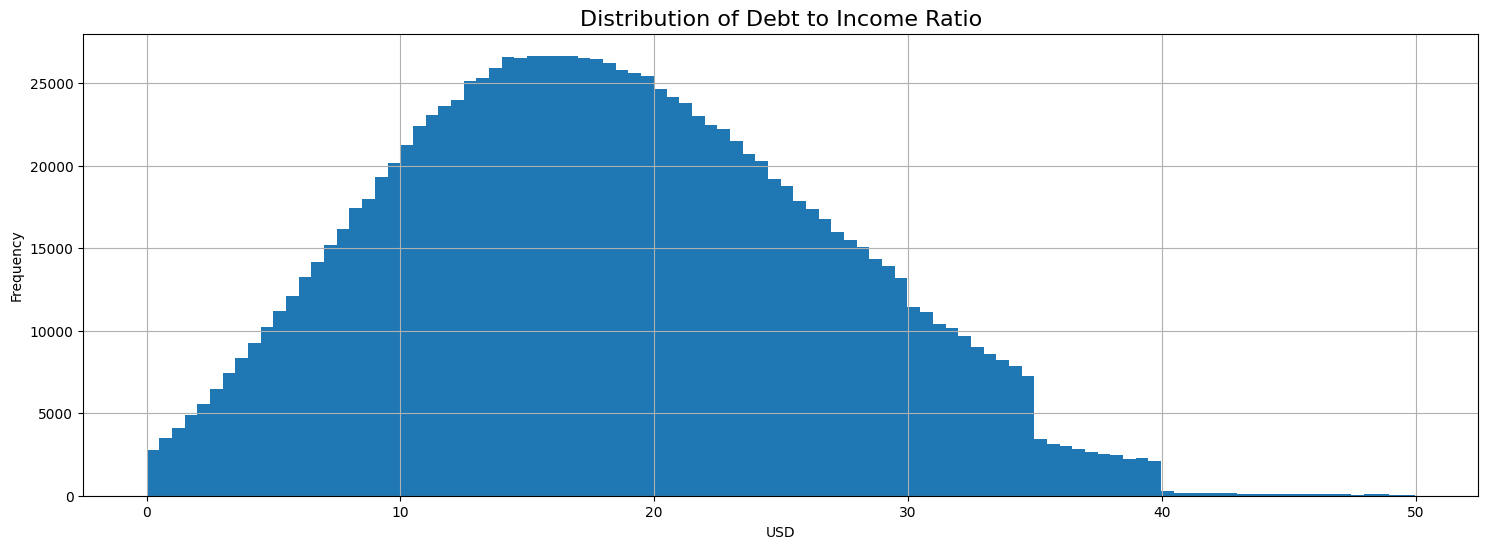

In [47]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

# histogram
df['dti'].hist(bins=100)
axs.set_title('Distribution of Debt to Income Ratio', fontsize=16)
axs.set_ylabel("Frequency")
axs.set_xlabel("USD")

round(df['dti'].describe(percentiles=[0.125,0.25,0.375,0.5,0.625,0.75,0.875]))

* The debt payment to income ratio of the applicants have a fairly normal distribution, apart from the steep decreases at around the 30, 35, and 40 dti marks.
* The steep dropoff could be indicative of the dti limit that lenders/banks are comfortable with when approving loans.

#### FICO Score

count    1228786.0
mean         693.0
std           30.0
min          640.0
12.5%        665.0
25%          670.0
37.5%        680.0
50%          685.0
62.5%        695.0
75%          710.0
87.5%        725.0
max          845.0
Name: fico_range_low, dtype: float64
count    1228786.0
mean         697.0
std           30.0
min          644.0
12.5%        669.0
25%          674.0
37.5%        684.0
50%          689.0
62.5%        699.0
75%          714.0
87.5%        729.0
max          850.0
Name: fico_range_high, dtype: float64


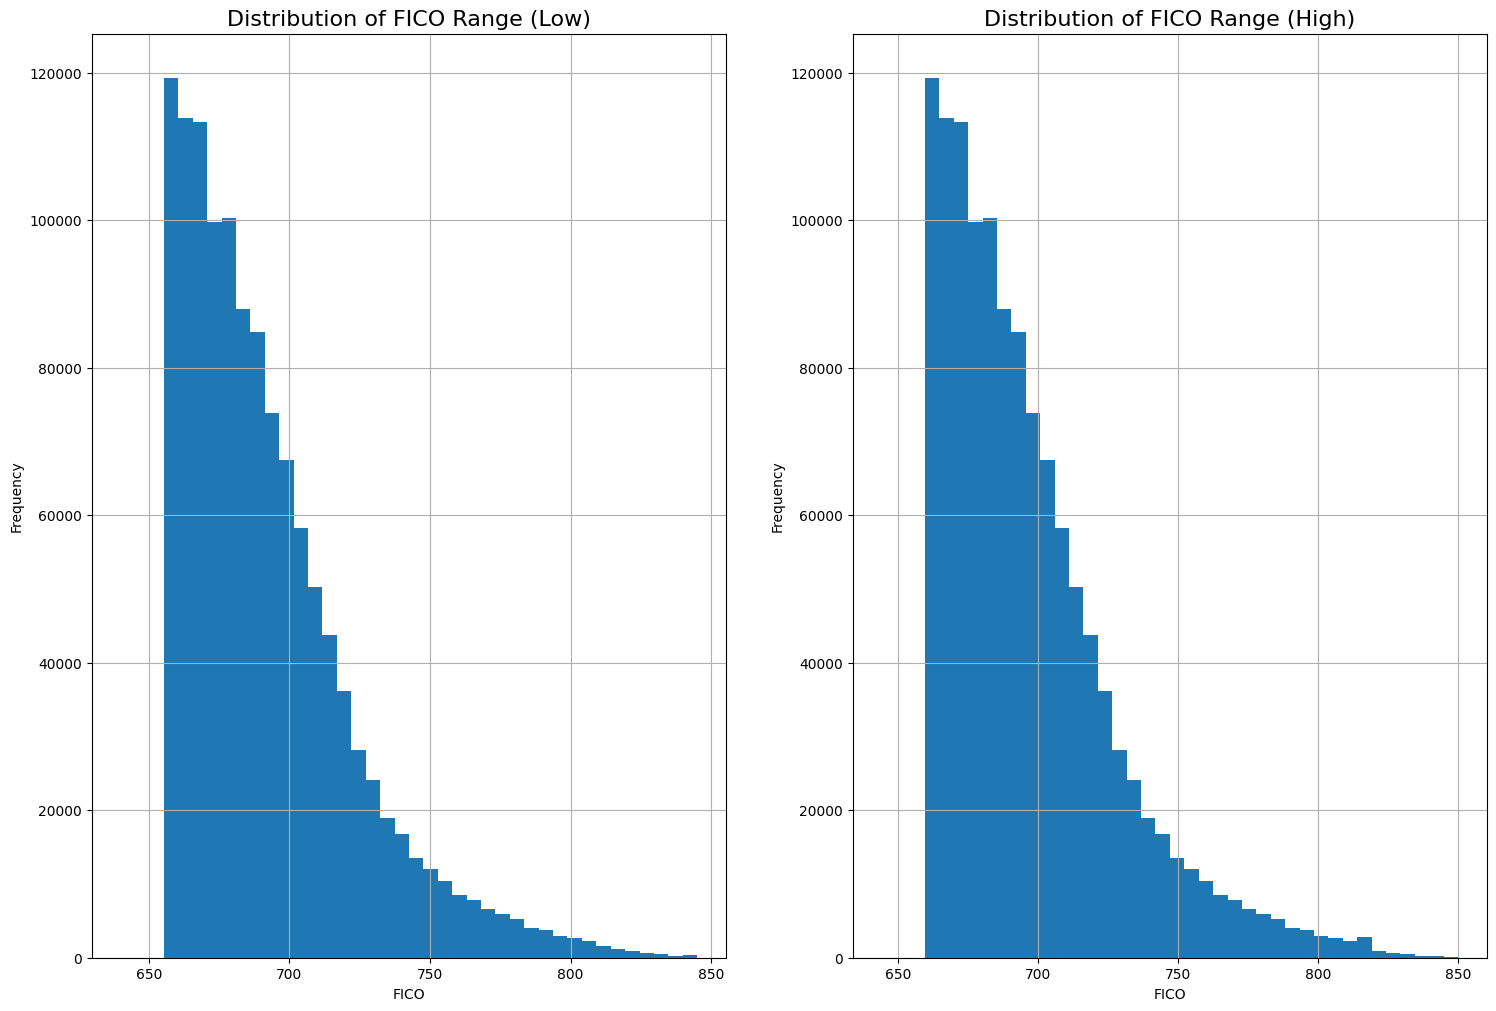

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(18, 12))

# histogram
df['fico_range_low'].hist(bins=40, ax=axs[0])
axs[0].set_title('Distribution of FICO Range (Low)', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("FICO")

df['fico_range_high'].hist(bins=40, ax=axs[1])
axs[1].set_title('Distribution of FICO Range (High)', fontsize=16)
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("FICO")

print(round(df['fico_range_low'].describe(percentiles=[0.125,0.25,0.375,0.5,0.625,0.75,0.875])))
print(round(df['fico_range_high'].describe(percentiles=[0.125,0.25,0.375,0.5,0.625,0.75,0.875])))

* As described before, the fico scores from both categories are very similar, with fico_range_high being consistently 4 to 5 points higher than fico_range_low.
* To remove this redundancy in information, a new field called average_fico will take their place instead.

(641.793, 683.1]    546529
(683.1, 724.2]      502827
(724.2, 765.3]      132598
(765.3, 806.4]       39103
(806.4, 847.5]        7729
Name: count, dtype: int64


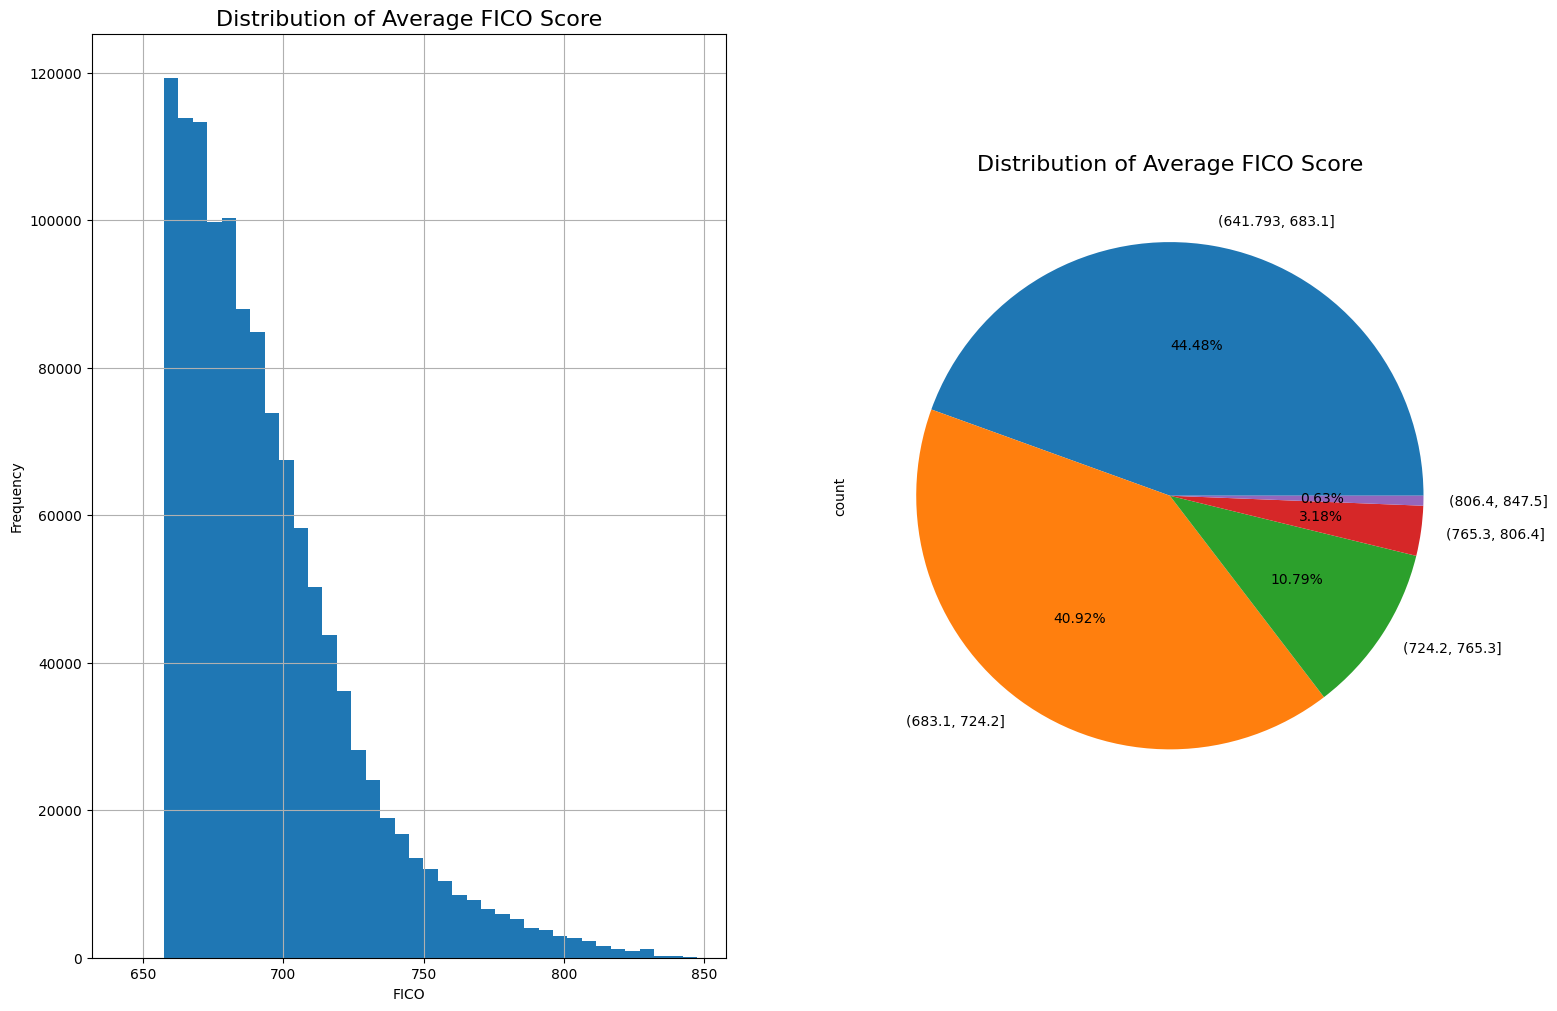

In [49]:
df['average_fico']=0.5*(df['fico_range_low']+df['fico_range_high'])

fig, axs = plt.subplots(1, 2, figsize=(18, 12))
# histogram
df['average_fico'].hist(bins=40, ax=axs[0])
axs[0].set_title('Distribution of Average FICO Score', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("FICO")

# pie
fico_bin=df['average_fico'].value_counts(bins=5).sort_index()
fico_bin.plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Distribution of Average FICO Score', fontsize=16)

print(fico_bin)

* The FICO scores of the loan applicants are right skewed, with more than 85% of them having FICO scores of 641 to 724, while the remaining 15% occupy the larger range of 724 to 848.


In [50]:
# drop outdated features.
df.drop(columns=['fico_range_low','fico_range_high'], inplace=True)

###  Categorical Features

In [51]:
# classes in categorical columns.
category_feat = df.select_dtypes('object').columns.values
df[category_feat].nunique().sort_values()

verification_status     2
initial_list_status     2
home_ownership          6
grade                   7
emp_length             11
purpose                14
sub_grade              35
addr_state             51
dtype: int64

#### Loan Term, Verification Status, Default Status

Text(0.5, 1.0, 'Default Status')

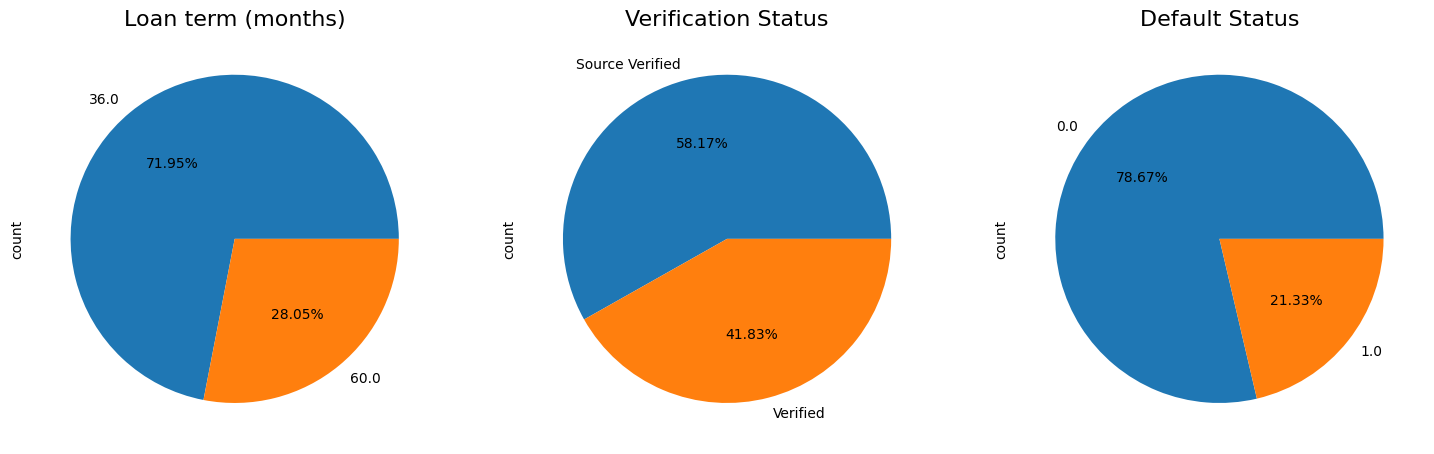

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(18,12))

# pie chart
df['term'].value_counts().plot.pie(ax=axs[0], autopct='%.2f%%')
axs[0].set_title('Loan term (months)', fontsize=16)

df['verification_status'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Verification Status', fontsize=16)
    
df['default_status'].value_counts().plot.pie(ax=axs[2], autopct='%.2f%%')
axs[2].set_title('Default Status', fontsize=16)

* The majority of loans have a 36 month term at 72.49% while 27.51% have 60 month loan terms.
* Slightly over half of the loan applications are source verified.
* The majority (77.83%) of loans that are accepted are paid off while the rest are not fully paid off.

#### Home Ownership, Employment Length, Loan Purpose

In [53]:
print(df['emp_length'].value_counts())

emp_length
10+ years    406897
2 years      109653
< 1 year      98616
3 years       97437
1 year        83672
5 years       75648
4 years       73100
6 years       55906
8 years       52628
7 years       51745
9 years       44669
Name: count, dtype: int64


In [54]:
print(df['home_ownership'].value_counts().sort_index())
print("*****************************")
print(df['purpose'].value_counts().sort_index())

home_ownership
ANY            691
MORTGAGE    592478
NONE            28
OTHER           88
OWN         135886
RENT        499615
Name: count, dtype: int64
*****************************
purpose
car                    11105
credit_card           258879
debt_consolidation    719447
educational              117
home_improvement       76101
house                   8220
major_purchase         25366
medical                14252
moving                 10145
other                  77463
renewable_energy        1012
small_business         16660
vacation                8629
wedding                 1390
Name: count, dtype: int64


Text(0, 0.5, 'Percentage')

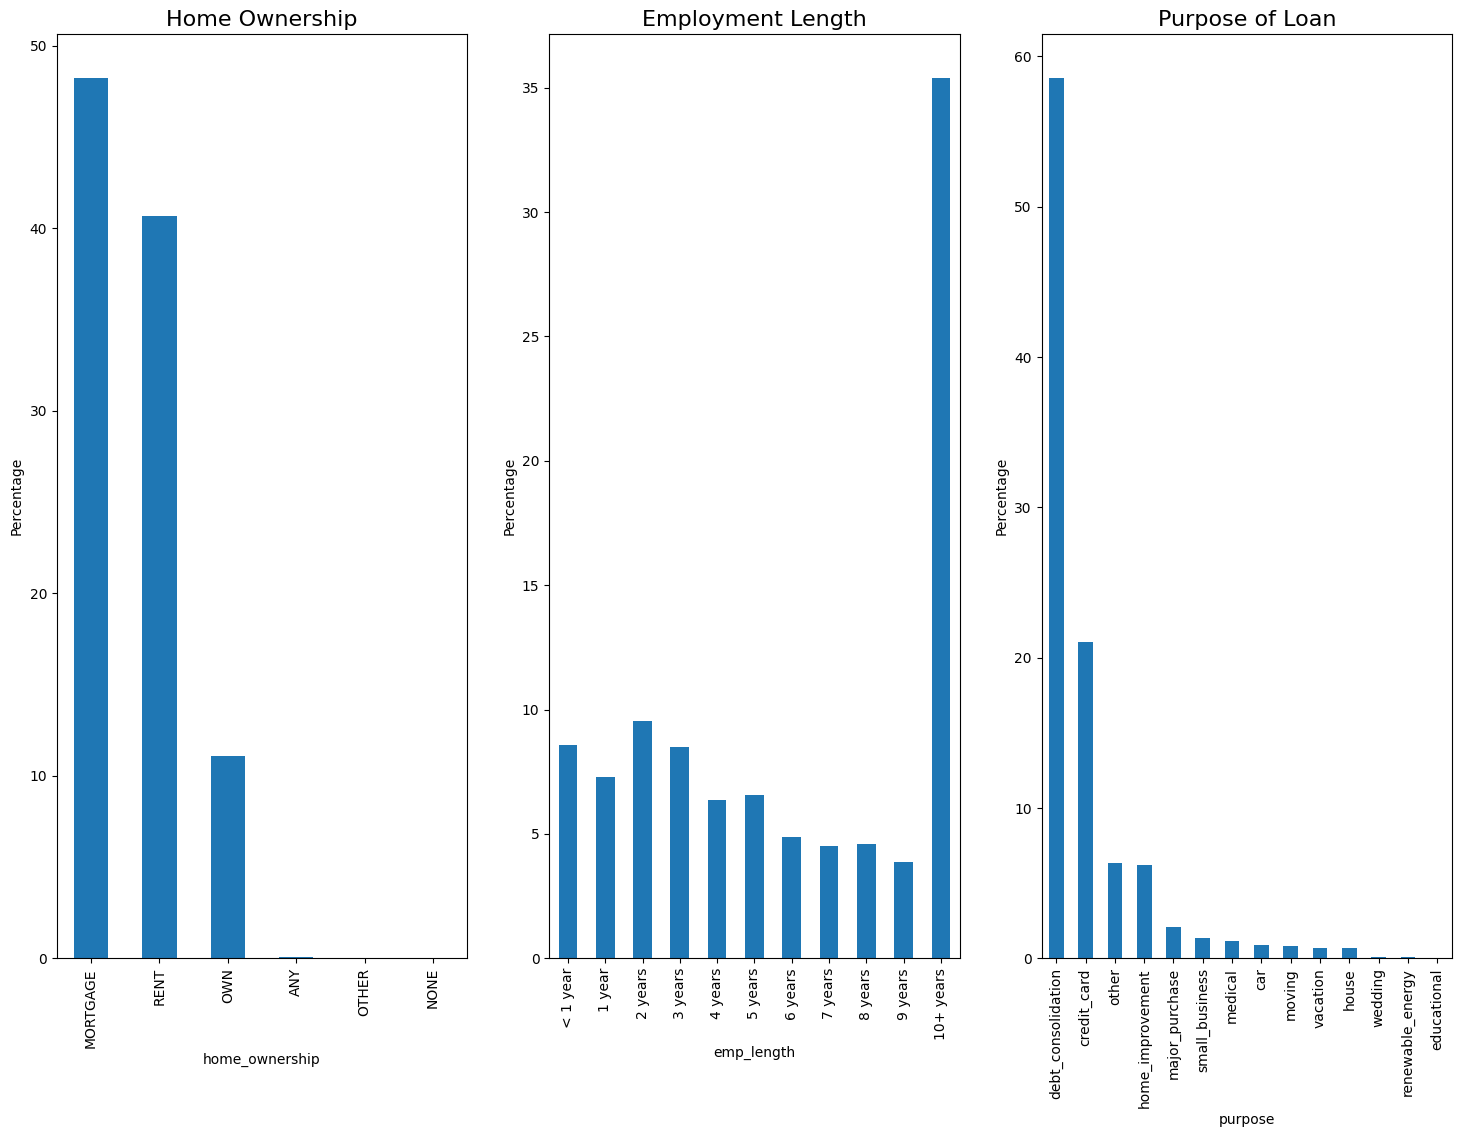

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(18,12))
# bar chart
df['home_ownership'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0])
axs[0].set_title('Home Ownership', fontsize=16)
axs[0].set_ylabel("Percentage")

# reordering classes in right order
order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
df['emp_length'] = pd.Categorical(df['emp_length'], categories=order, ordered=True)

df['emp_length'].value_counts(normalize=True).mul(100).sort_index().plot.bar(ax=axs[1])
axs[1].set_title('Employment Length', fontsize=16)
axs[1].set_ylabel("Percentage")

df['purpose'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[2])
axs[2].set_title('Purpose of Loan', fontsize=16)
axs[2].set_ylabel("Percentage")

* almost all of the homeownership statuses of loan applicatns fall under mortgage, rent and own caategories while only a negligible number of them fall under the non, other, and any categories.
* Around 35% of loan applicants have been employed for more than 10 years, while the rest are distributed across the less than 1 year to 9 year categories.
* More than half of the loan applicants are applying for the purpose of debt consolidation, while only a small amount are applying for wedding, educational, and renewable energy purposes.

#### Sub-Grade and Address State

Text(0, 0.5, 'Percentage')

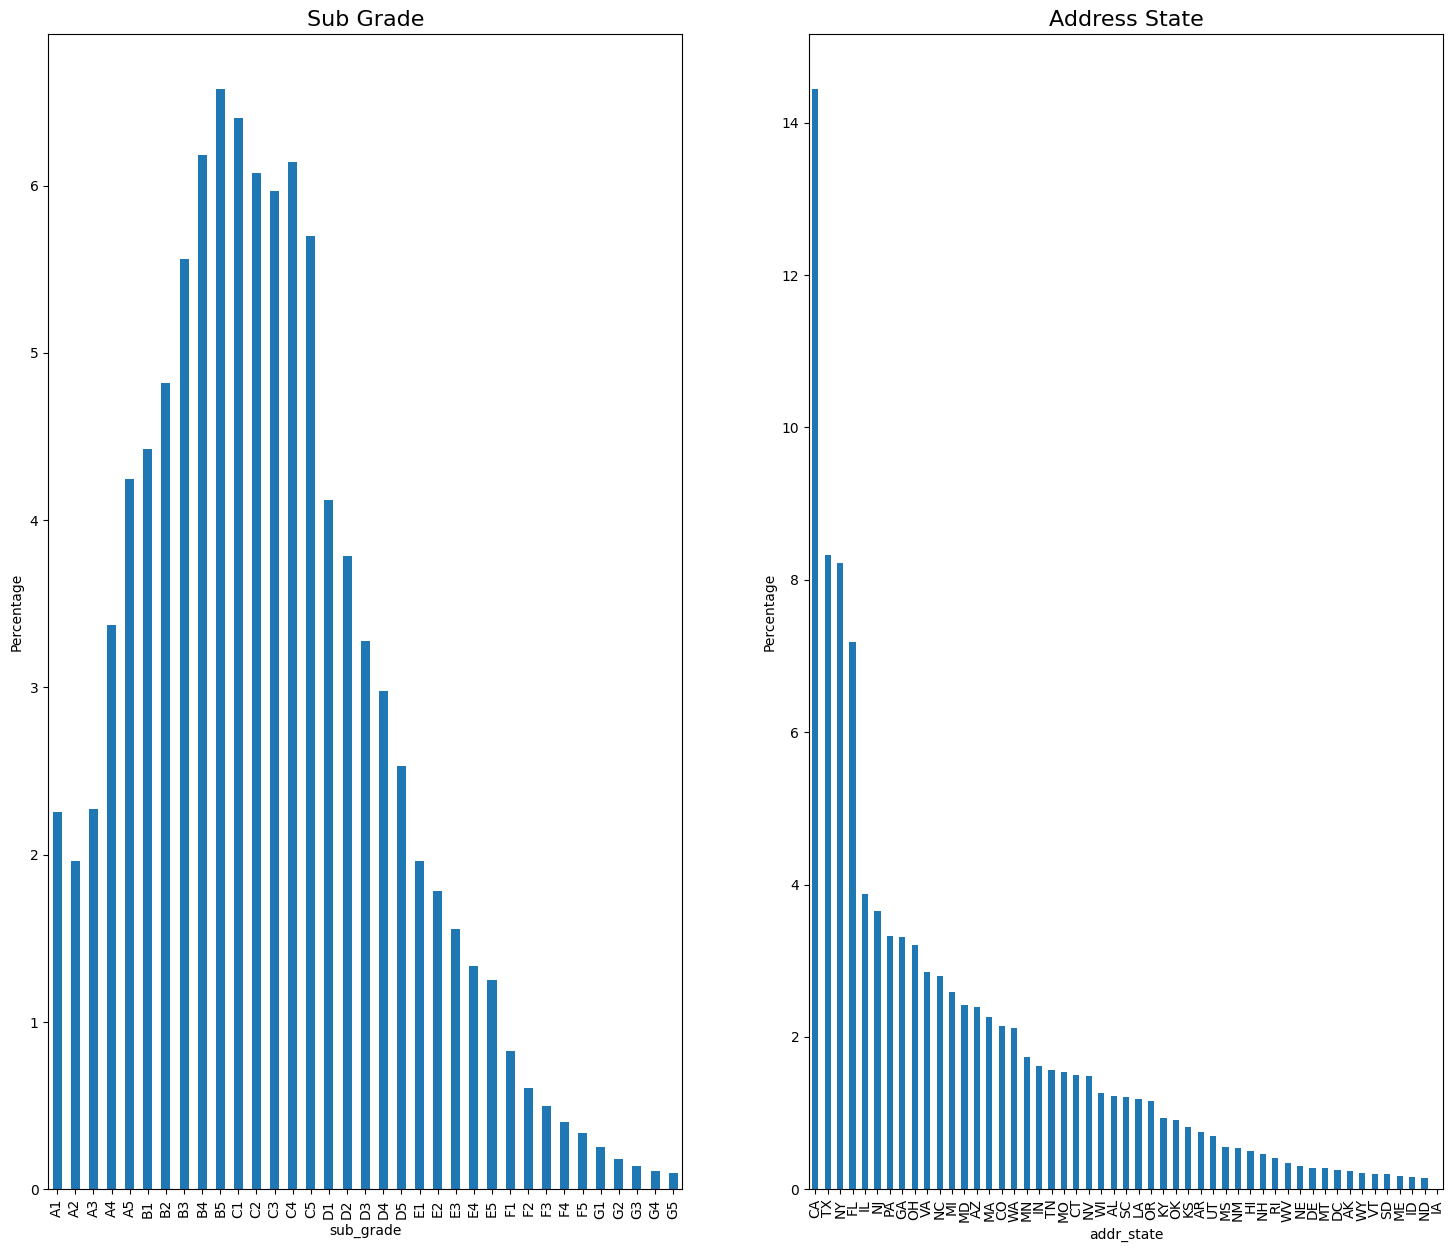

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(18,15))
# bar chart
df['sub_grade'].value_counts(normalize=True).mul(100).sort_index().plot.bar(ax=axs[0])
axs[0].set_title('Sub Grade', fontsize=16)
axs[0].set_ylabel("Percentage")

df['addr_state'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[1])
axs[1].set_title('Address State', fontsize=16)
axs[1].set_ylabel("Percentage")

* The loan grades are centered around the B5 class, with a right skew towards the weaker grades of F and G.
* The state with the highest amount of applicants is CA (California), followed by TX (Texas) and NY (New York).

## Bivariate EDA

#### Default Rates by Various Factors

Text(0.5, 0, 'Employment Length')

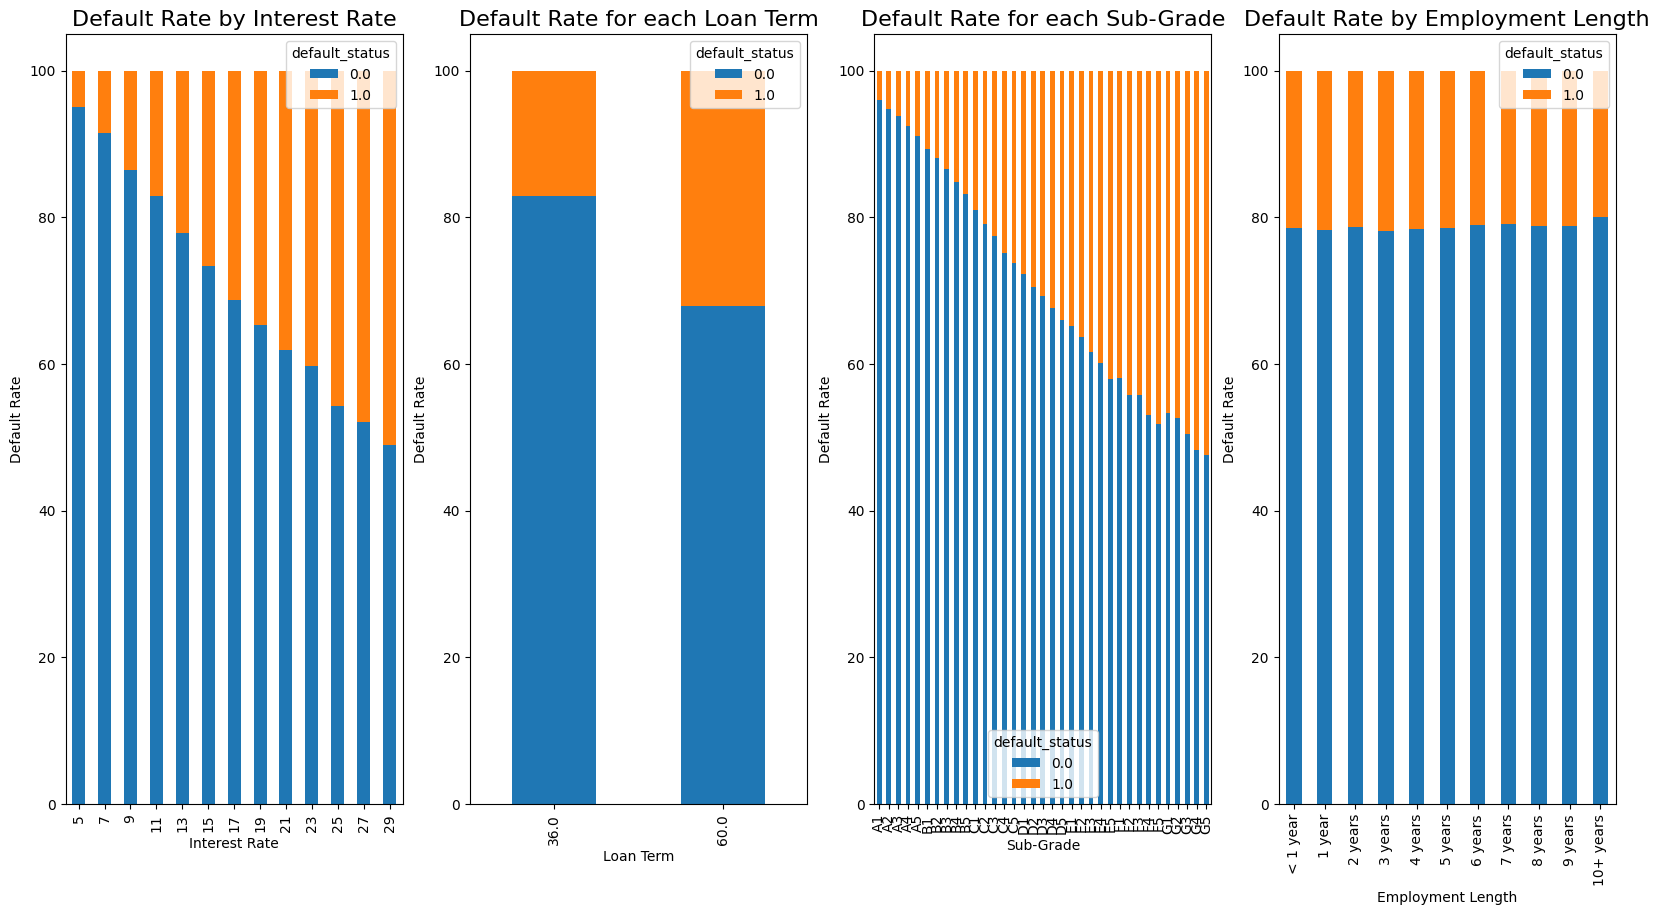

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))
# bar chart
bins =range(5,32,2) 
labels=range(5,31,2)
pd.crosstab(pd.cut(df['int_rate'], bins=bins, labels=labels), df['default_status'], normalize='index').mul(100).plot.bar(stacked=True, ax=axs[0])
axs[0].set_title('Default Rate by Interest Rate', fontsize=16)
axs[0].set_ylabel("Default Rate")
axs[0].set_xlabel("Interest Rate")

pd.crosstab(df['term'], df['default_status'], normalize='index').mul(100).plot.bar(stacked=True, ax=axs[1])
axs[1].set_title('Default Rate for each Loan Term', fontsize=16)
axs[1].set_ylabel("Default Rate")
axs[1].set_xlabel("Loan Term")

pd.crosstab(df['sub_grade'], df['default_status'], normalize='index').mul(100).sort_index().plot.bar(stacked=True, ax=axs[2])
axs[2].set_title('Default Rate for each Sub-Grade', fontsize=16)
axs[2].set_ylabel("Default Rate")
axs[2].set_xlabel("Sub-Grade")

pd.crosstab(df['emp_length'], df['default_status'], normalize='index').mul(100).sort_index().plot.bar(stacked=True, ax=axs[3])
axs[3].set_title('Default Rate by Employment Length', fontsize=16)
axs[3].set_ylabel("Default Rate")
axs[3].set_xlabel("Employment Length")

* Higher interest rates generally cause high default rates.
* 60 month loans has a higher default rate than the 36 month ones.
* The Sub-Grades of the loan are pretty accurate as lower grade loans face a higher default rate.
* The employment length of the loan applicants has no bearing on the default rate, at least visually.

Text(0.5, 0, 'Default Status')

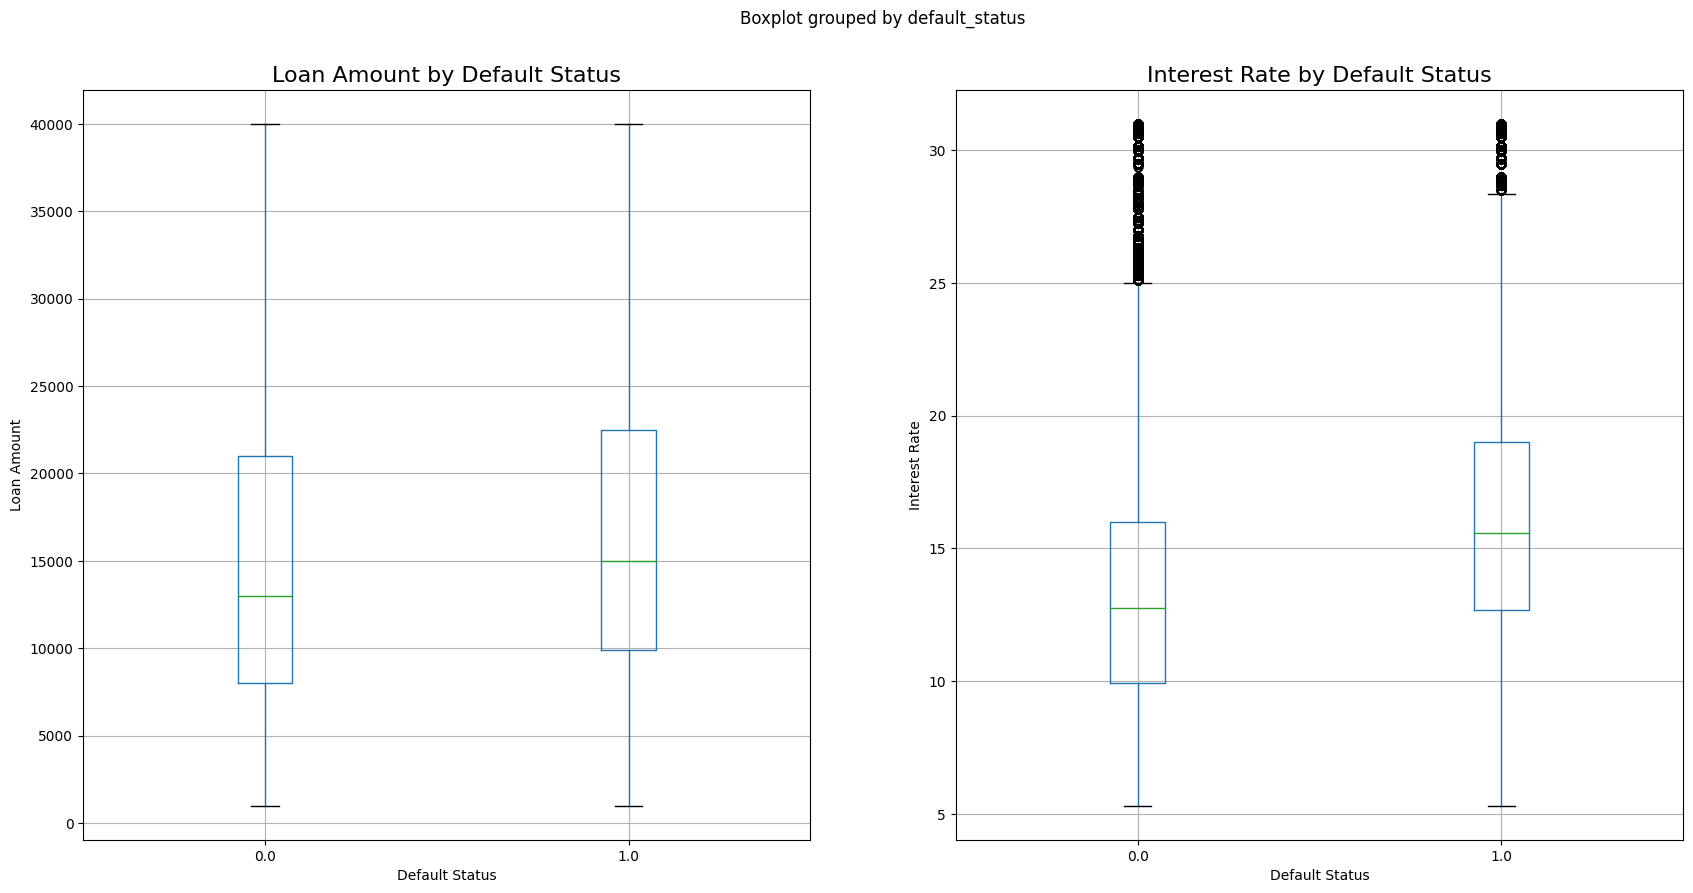

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# box plot
df.boxplot(column='loan_amnt', by='default_status',ax=axs[0])
axs[0].set_title('Loan Amount by Default Status', fontsize=16)
axs[0].set_ylabel("Loan Amount")
axs[0].set_xlabel("Default Status")

df.boxplot(column='int_rate', by='default_status',ax=axs[1])
axs[1].set_title('Interest Rate by Default Status', fontsize=16)
axs[1].set_ylabel("Interest Rate")
axs[1].set_xlabel("Default Status")

* Eventual defaulters has a have tend to borrow more than the loan applicants who paid off fully.
* Eventual defaulters tend to be assigned higher interest rates than those who didn't end up defaulting.

#### Loan Amount by various Factors

Text(0.5, 0, 'Loan Term')

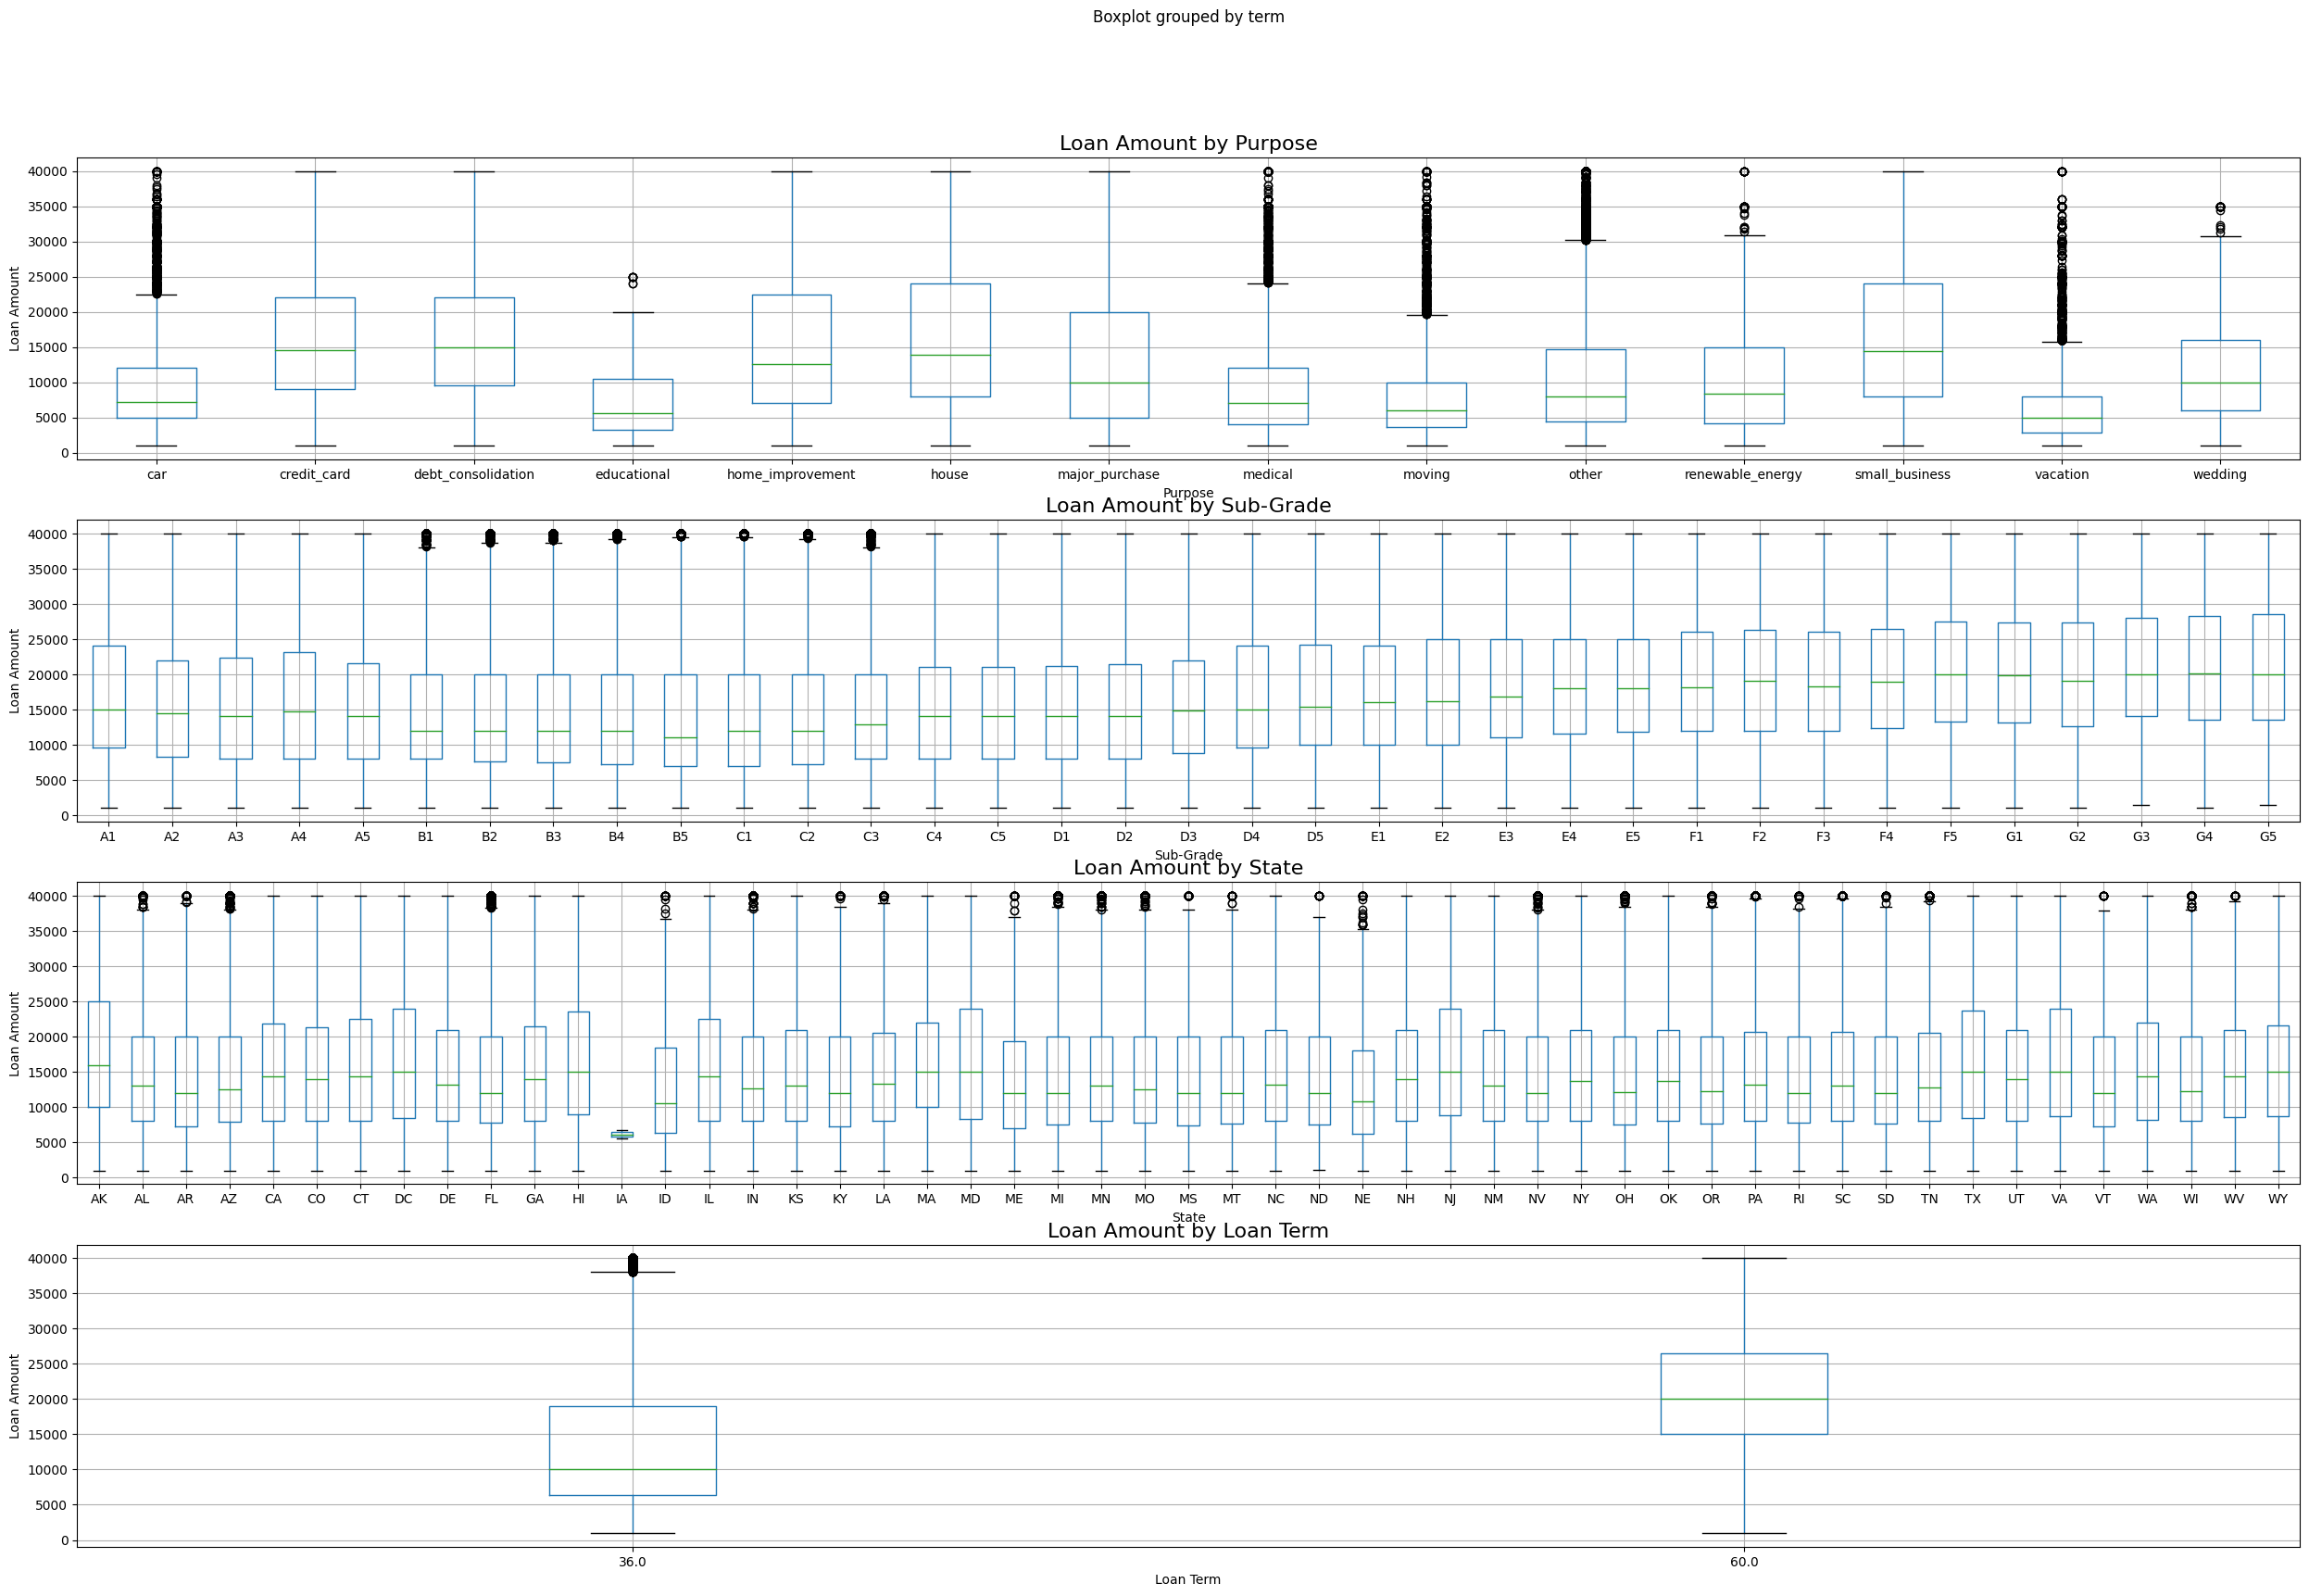

In [59]:
fig, axs = plt.subplots(4, 1, figsize=(30,20))

# box plot
df.boxplot(column='loan_amnt', by='purpose',ax=axs[0])
axs[0].set_title('Loan Amount by Purpose', fontsize=16)
axs[0].set_ylabel("Loan Amount")
axs[0].set_xlabel("Purpose")

df.boxplot(column='loan_amnt', by='sub_grade',ax=axs[1])
axs[1].set_title('Loan Amount by Sub-Grade', fontsize=16)
axs[1].set_ylabel("Loan Amount")
axs[1].set_xlabel("Sub-Grade")

df.boxplot(column='loan_amnt', by='addr_state',ax=axs[2])
axs[2].set_title('Loan Amount by State', fontsize=16)
axs[2].set_ylabel("Loan Amount")
axs[2].set_xlabel("State")

df.boxplot(column='loan_amnt', by='term',ax=axs[3])
axs[3].set_title('Loan Amount by Loan Term', fontsize=16)
axs[3].set_ylabel("Loan Amount")
axs[3].set_xlabel("Loan Term")

* Those who borrow for their credit card, debt consolidation, houses, and small businesses tend to borrow more while those who borrow for their educations and vacations tend to borrow less.
* Loans assigned a sub-grade of B tend to have the lowest loan amount while those assigned F and G tend to have higher loan amounts.
* There is generally very little correlation between the address state of loan applicants and the loan amount. Applicants from Alaska(AK) averaged the highest loan amount while those from Idaho(ID) and Iowa(IA) borrowed the lowest on average (Though Lending Club received very few loan applications from Iowa).
* Understandably, those who borrowed more tend to opt for a longer payment of 60 months

#### Others

Text(0.5, 0, 'DTI')

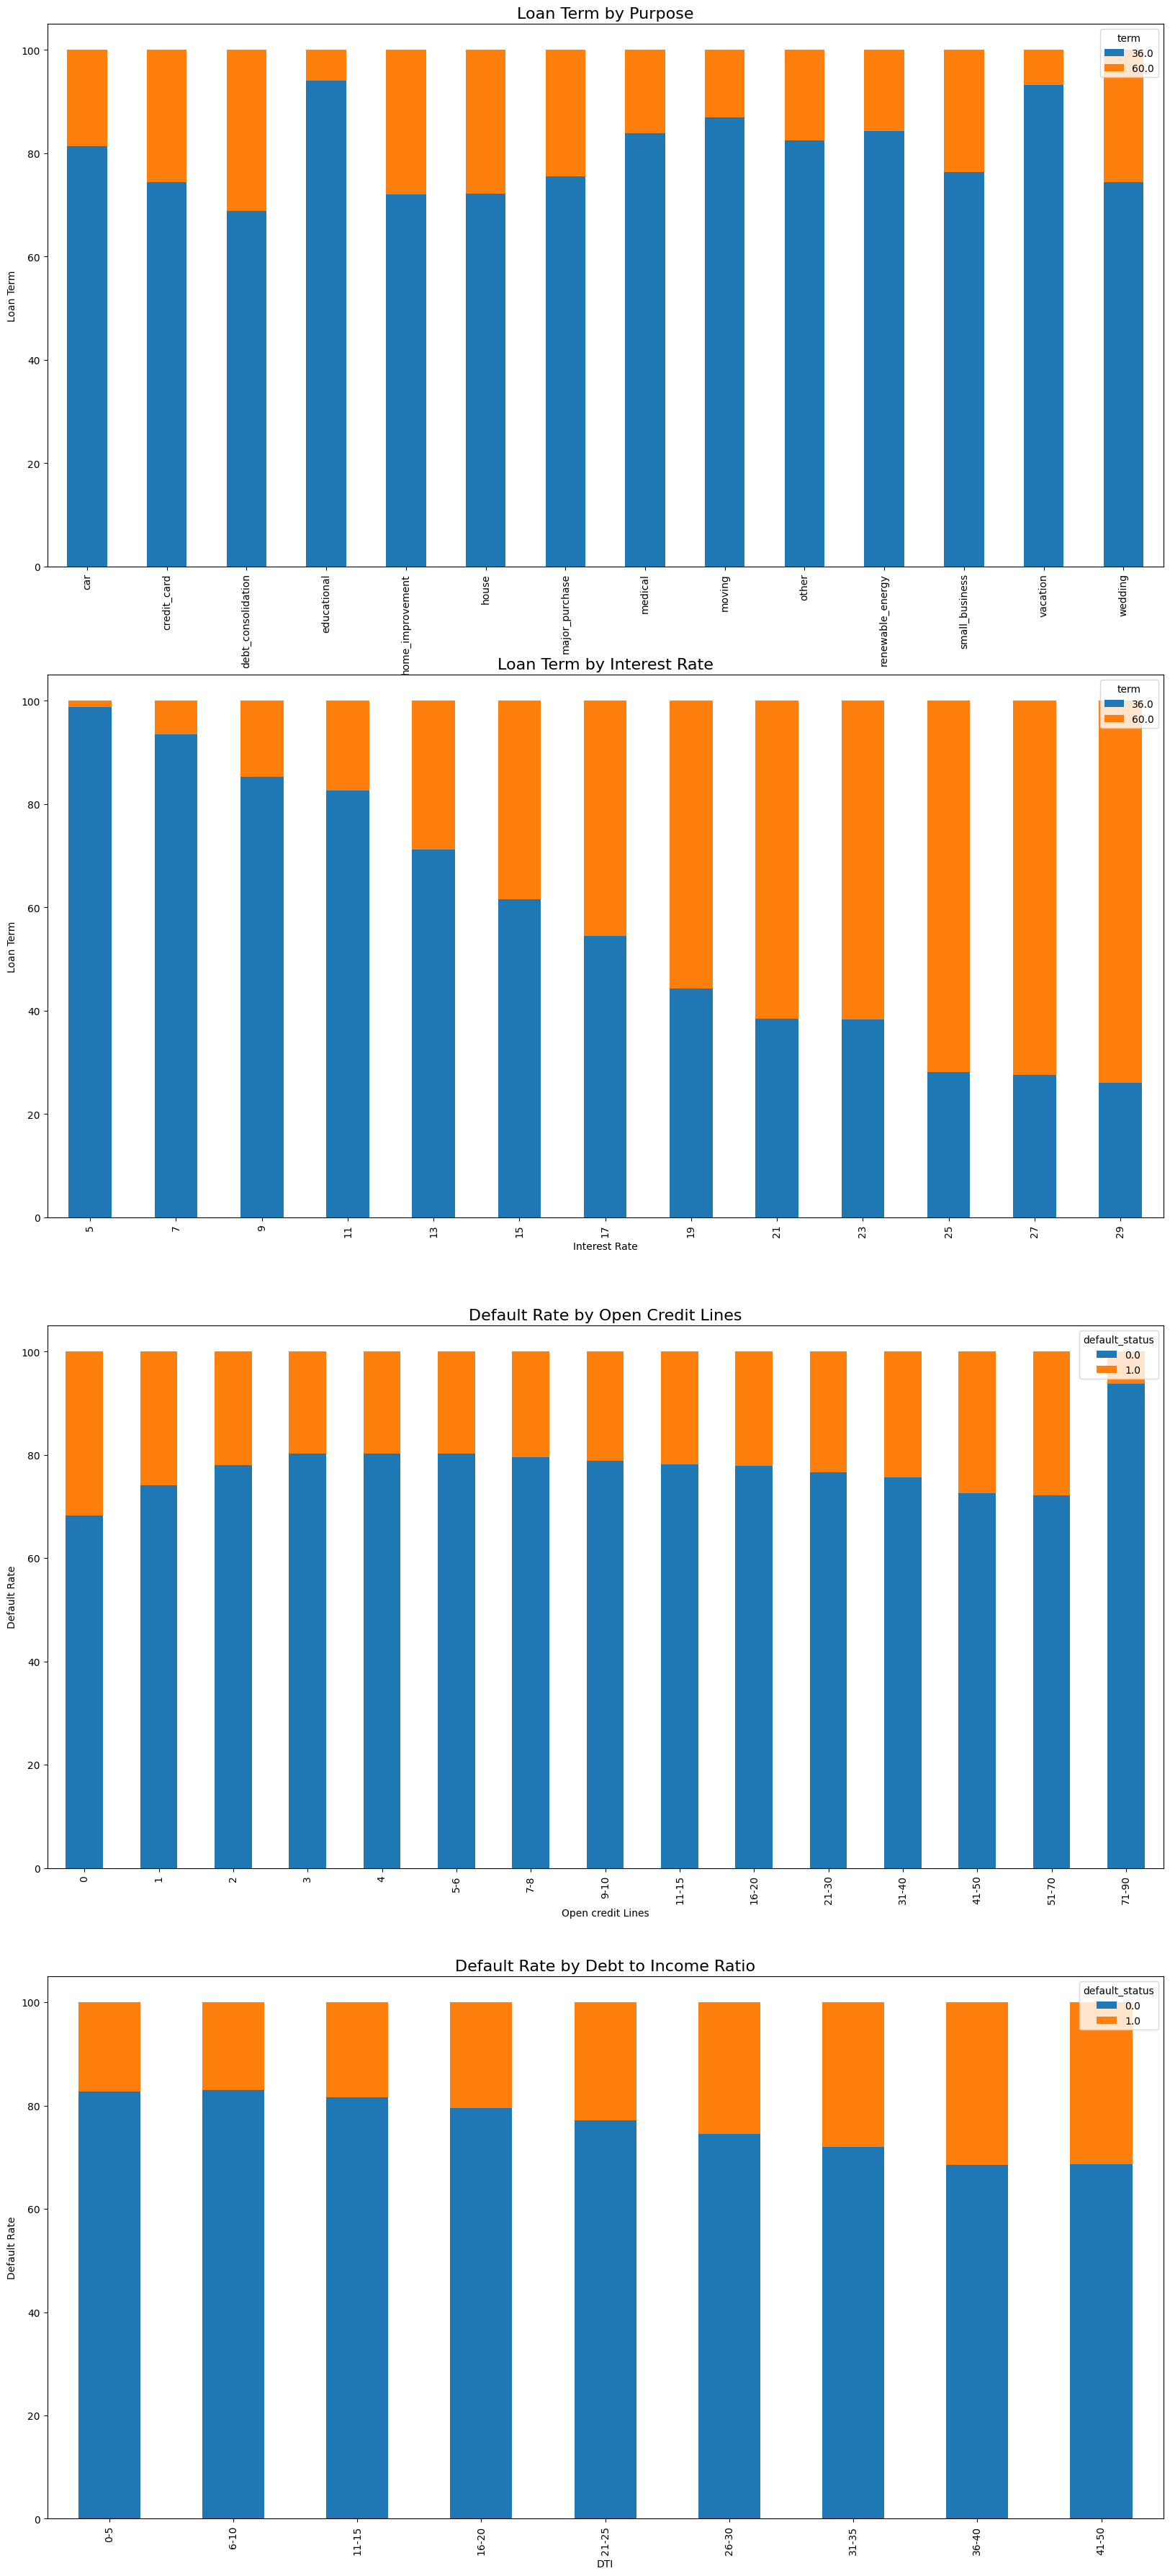

In [60]:
fig, axs = plt.subplots(4, 1, figsize=(20,45))

pd.crosstab(df['purpose'], df['term'], normalize='index').mul(100).plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Loan Term by Purpose', fontsize=16)
axs[0].set_ylabel("Loan Term")
axs[0].set_xlabel("Purpose")

bins =range(5,32,2) 
labels=range(5,31,2)
pd.crosstab(pd.cut(df['int_rate'], bins=bins, labels=labels), df['term'], normalize='index').mul(100).plot.bar(stacked=True, ax=axs[1])
axs[1].set_title('Loan Term by Interest Rate', fontsize=16)
axs[1].set_ylabel("Loan Term")
axs[1].set_xlabel("Interest Rate")

bins =[-1,0,1,2,3,4,6,8,10,15,20,30,40,50,70,90] 
labels=[0,1,2,3,4,'5-6','7-8','9-10','11-15','16-20','21-30','31-40','41-50','51-70','71-90']
pd.crosstab(pd.cut(df['open_acc'], bins=bins,labels=labels), df['default_status'], normalize='index').mul(100).plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Default Rate by Open Credit Lines', fontsize=16)
axs[2].set_ylabel("Default Rate")
axs[2].set_xlabel("Open credit Lines")

bins =[-1,5,10,15,20,25,30,35,40,50] 
labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-50']
pd.crosstab(pd.cut(df['dti'], bins=bins, labels=labels), df['default_status'], normalize='index').mul(100).plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Default Rate by Debt to Income Ratio', fontsize=16)
axs[3].set_ylabel("Default Rate")
axs[3].set_xlabel("DTI")

* Those borrowing for a vacation and education tend to choose a lower repayment period, while those borrowing for debt consolidation, houses, and home improvement are most likely to choose the higher repayment period.
* The lower the interest rate, the more likely the loan term is low/36 months.
* Those with 0 open credit lines are most likely to default while those who has a very high number of open credit lines are least likely to default.
* The higher the debt-to-income ratio of the loan applicant, the more likely the loan is going to end up defaulted

In [61]:
# Correlation
corr_table = df.select_dtypes(include=['number']).corr().abs()
print(corr_table[corr_table>0.7].unstack().transpose().sort_values(ascending=False).drop_duplicates())

loan_amnt  loan_amnt      1.000000
           installment    0.950348
           term                NaN
dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

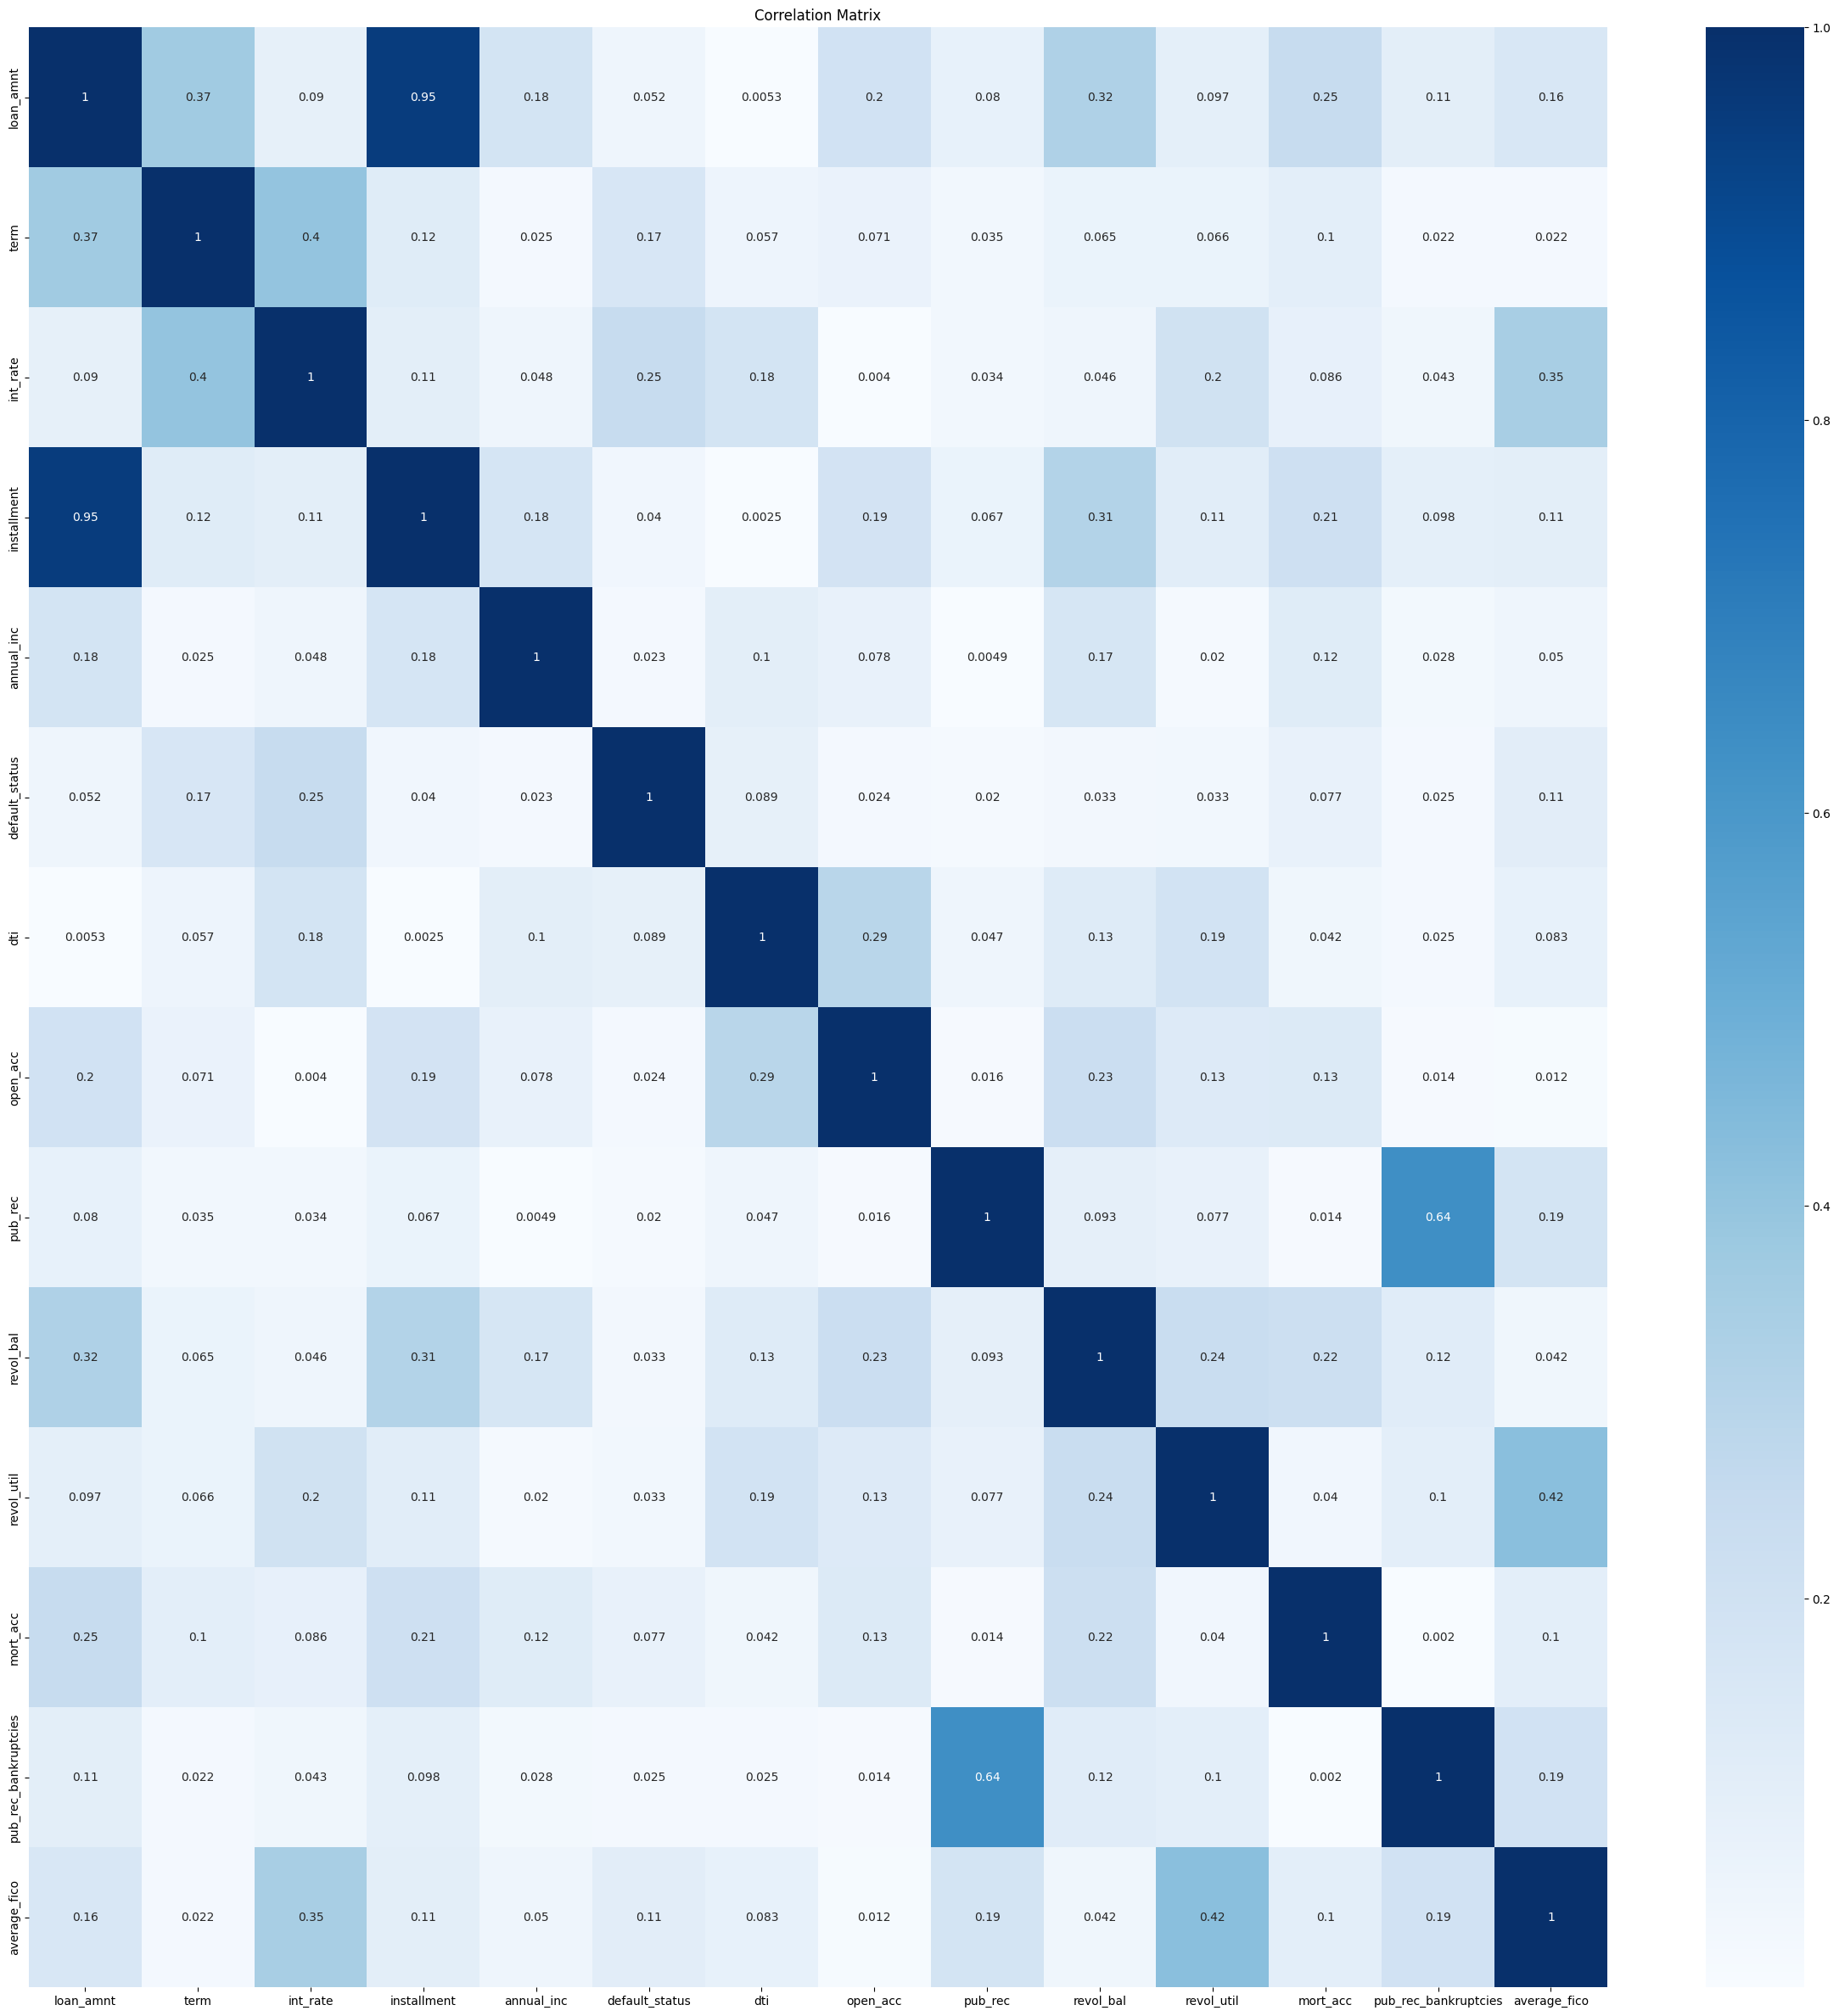

In [62]:
import seaborn as sns
plt.figure(figsize=(30,30))        
sns.heatmap(corr_table, annot=True, cmap="Blues")
plt.title('Correlation Matrix')

* As seen, either installment or loan amount needs removing as they are highly correlated.

In [63]:
df=df.drop(columns=['installment'],axis=1)

In [64]:
df.shape

(1228786, 23)

In [65]:
df.columns.values

array(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'default_status', 'purpose',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'mort_acc',
       'pub_rec_bankruptcies', 'addr_state', 'average_fico'], dtype=object)

* Removing 'grade' as it has overlapping information with sub_grade.

In [66]:
df=df.drop(columns=['grade'],axis=1)

## Conclusion of EDA

* People come to Lending Club to borrow a fairly low amount of money, ranging from 1,000 USD to 40,000
* More than 75% of loan applicants come with a good FICO score of at least 670.
* Loan applicants tend to apply for shorter (36 month) loan terms and around 78% of them pay off their loans.
* Some brief analysis showed that lower interest rates, longer loan terms, better loan grades, and lower loan amounts are indicative of higher chances of paying off the loan.
* Applicants borrowing for the purpose of credit cards, debt consolidation, and small business financing are the ones who apply for a higher loan amount .
* A higher debt to income ratio indicates a higher likelihood of default.

# Data Pre-Processing

## Missing Values

* Percentage of missing values in columns with missing values.

In [67]:
nan_in_col = df.isna().mean().sort_values()
pd.set_option('display.max_rows', None)
nan_in_col[nan_in_col != 0]

pub_rec_bankruptcies    0.000003
revol_util              0.000758
mort_acc                0.023578
emp_length              0.064141
dtype: float64

In [68]:
#Impute NAs.
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['mort_acc'] = df['mort_acc'].fillna(0)
df['emp_length'] = df['emp_length'].fillna('< 1 year')

#### After Imputation.

In [69]:
nan_in_col = df.isna().mean().sort_values()
pd.set_option('display.max_rows', None)
nan_in_col[nan_in_col != 0]

Series([], dtype: float64)

## Label Encoding

In [70]:
categoric_feat = df.select_dtypes(include=['object','category']).columns.values
df[categoric_feat].nunique().sort_values()

verification_status     2
initial_list_status     2
home_ownership          6
emp_length             11
purpose                14
sub_grade              35
addr_state             51
dtype: int64

In [71]:
for i in df.columns[df.columns.isin(categoric_feat)]:
    print(df[i].value_counts())
    print('************************')

sub_grade
B5    80794
C1    78702
B4    75942
C4    75420
C2    74652
C3    73346
C5    70055
B3    68332
B2    59192
B1    54409
A5    52182
D1    50644
D2    46523
A4    41465
D3    40245
D4    36634
D5    31117
A3    27918
A1    27685
A2    24128
E1    24111
E2    21933
E3    19147
E4    16439
E5    15367
F1    10148
F2     7421
F3     6130
F4     4949
F5     4125
G1     3115
G2     2251
G3     1698
G4     1351
G5     1216
Name: count, dtype: int64
************************
emp_length
10+ years    406897
< 1 year     177431
2 years      109653
3 years       97437
1 year        83672
5 years       75648
4 years       73100
6 years       55906
8 years       52628
7 years       51745
9 years       44669
Name: count, dtype: int64
************************
home_ownership
MORTGAGE    592478
RENT        499615
OWN         135886
ANY            691
OTHER           88
NONE            28
Name: count, dtype: int64
************************
verification_status
Source Verified    714831
Verified   

In [72]:
df['source_verified'] = df['verification_status'].isin(['Source Verified']).astype('int')
df = df.drop(['verification_status'], axis=1)

df['initial_list_status_whole'] = df['initial_list_status'].isin(['w']).astype('int')
df = df.drop(['initial_list_status'], axis=1)

df['sub_grade'] = df['sub_grade'].replace({'A1':'1', 'A2':'2', 'A3':'3', 'A4':'4', 'A5':'5', 
                                                   'B1':'6', 'B2':'7', 'B3':'8', 'B4':'9', 'B5':'10',
                                                   'C1':'11', 'C2':'12', 'C3':'13', 'C4':'14', 'C5':'15',
                                                   'D1':'16', 'D2':'17', 'D3':'18', 'D4':'19', 'D5':'20',
                                                   'E1':'21', 'E2':'22', 'E3':'23', 'E4':'24', 'E5':'25', 
                                                   'F1':'26', 'F2':'27', 'F3':'28', 'F4':'29', 'F5':'30',
                                                   'G1':'31', 'G2':'32', 'G3':'33', 'G4':'34', 'G5':'35'}).astype('int')

df['emp_length'] = df['emp_length'].replace({'< 1 year': '0 years', '1 year': '1 years', '10+ years': '10 years'})
df['emp_length'] = df['emp_length'].str.replace(' years', '').astype('int')

df['home_ownership'] = df['home_ownership'].replace({'ANY': 'OTHER', 'NONE': 'OTHER'})

df['purpose'] = df['purpose'].replace({'educational':'other','renewable_energy':'other','wedding':'other'})

/tmp/ipykernel_30/596169939.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['emp_length'] = df['emp_length'].replace({'< 1 year': '0 years', '1 year': '1 years', '10+ years': '10 years'})


In [73]:
categoric_feat = df.select_dtypes(include=['object','category']).columns.values
for i in df.columns[df.columns.isin(categoric_feat)]:
    if i != 'earliest_cr_line':
        print(df[i].value_counts())
        print('************************')

home_ownership
MORTGAGE    592478
RENT        499615
OWN         135886
OTHER          807
Name: count, dtype: int64
************************
purpose
debt_consolidation    719447
credit_card           258879
other                  79982
home_improvement       76101
major_purchase         25366
small_business         16660
medical                14252
car                    11105
moving                 10145
vacation                8629
house                   8220
Name: count, dtype: int64
************************
addr_state
CA    177406
TX    102257
NY    101075
FL     88318
IL     47633
NJ     44874
PA     40788
GA     40754
OH     39329
VA     35013
NC     34428
MI     31800
MD     29788
AZ     29431
MA     27742
CO     26347
WA     26072
MN     21318
IN     19945
TN     19189
MO     18973
CT     18392
NV     18232
WI     15474
AL     15130
SC     14900
LA     14617
OR     14209
KY     11526
OK     11197
KS     10002
AR      9227
UT      8675
MS      6760
NM      6592
HI      6204
N

## Target Encoding

In [82]:
encoding_set = df[df['issue_d'] < '2015-01-01']
remain_set = df[df['issue_d'] >= '2015-01-01']

In [83]:
print(encoding_set.shape)
print(remain_set.shape)

(320237, 22)
(908549, 22)


In [84]:
import category_encoders as ce

smoothing_factor = 10 

encoder_addr = ce.TargetEncoder(cols=['addr_state'], smoothing=smoothing_factor) 
encoder_addr.fit(encoding_set['addr_state'], encoding_set['default_status'])
remain_set['addr_state'] = encoder_addr.transform(remain_set['addr_state'])

/tmp/ipykernel_30/618494527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_set['addr_state'] = encoder_addr.transform(remain_set['addr_state'])


In [85]:
encoder_purp = ce.TargetEncoder(cols=['purpose'], smoothing=smoothing_factor) 
encoder_purp.fit(encoding_set['purpose'], encoding_set['default_status'])
remain_set['purpose'] = encoder_purp.transform(remain_set['purpose'])

/tmp/ipykernel_30/4137783567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_set['purpose'] = encoder_purp.transform(remain_set['purpose'])


In [86]:
encoder_home = ce.TargetEncoder(cols=['home_ownership'], smoothing=smoothing_factor) 
encoder_home.fit(encoding_set['home_ownership'], encoding_set['default_status'])
remain_set['home_ownership'] = encoder_home.transform(remain_set['home_ownership'])

/tmp/ipykernel_30/604989538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_set['home_ownership'] = encoder_home.transform(remain_set['home_ownership'])


In [87]:
print(encoding_set['addr_state'].nunique())
print(remain_set['addr_state'].nunique())
print(encoding_set['purpose'].nunique())
print(remain_set['purpose'].nunique())
print(encoding_set['home_ownership'].nunique())
print(remain_set['home_ownership'].nunique())

50
50
11
11
4
4


## Date Features

* Label earliest_cr_line by replacing it with months since January 1900

In [88]:
print(min(remain_set['earliest_cr_line']))
print(max(remain_set['earliest_cr_line']))

1933-03-01 00:00:00
2017-01-01 00:00:00


In [90]:
remain_set['mths_sin_earliest_cr_line']=12*(remain_set['issue_d'].dt.year-remain_set['earliest_cr_line'].dt.year)+(remain_set['issue_d'].dt.month-remain_set['earliest_cr_line'].dt.month)

/tmp/ipykernel_30/1076195131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_set['mths_sin_earliest_cr_line']=12*(remain_set['issue_d'].dt.year-remain_set['earliest_cr_line'].dt.year)+(remain_set['issue_d'].dt.month-remain_set['earliest_cr_line'].dt.month)


In [91]:
print(min(remain_set['mths_sin_earliest_cr_line']))
print(max(remain_set['mths_sin_earliest_cr_line']))

37
999


In [92]:
remain_set = remain_set.drop(['earliest_cr_line'], axis=1)

In [94]:
remain_set.dtypes

loan_amnt                           float64
term                                float64
int_rate                            float64
sub_grade                             int64
emp_length                            int64
home_ownership                      float64
annual_inc                          float64
issue_d                      datetime64[ns]
default_status                      float64
purpose                             float64
dti                                 float64
open_acc                            float64
pub_rec                             float64
revol_bal                           float64
revol_util                          float64
mort_acc                            float64
pub_rec_bankruptcies                float64
addr_state                          float64
average_fico                        float64
source_verified                       int64
initial_list_status_whole             int64
mths_sin_earliest_cr_line             int32
dtype: object

## Split Data

In [95]:
remain_set.shape

(908549, 22)

In [99]:
remain_set['issue_d'].dt.year.value_counts().sort_index()

issue_d
2015    294907
2016    281668
2017    189097
2018    104831
2019     36099
2020      1947
Name: count, dtype: int64

In [102]:
train_set = remain_set[remain_set['issue_d'] < '2018-01-01']
test_set = remain_set[remain_set['issue_d'] >= '2018-01-01']

In [103]:
print(train_set.shape)
print(test_set.shape)

(765672, 22)
(142877, 22)


In [104]:
train_set.columns.values

array(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'default_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'mort_acc', 'pub_rec_bankruptcies', 'addr_state', 'average_fico',
       'source_verified', 'initial_list_status_whole',
       'mths_sin_earliest_cr_line'], dtype=object)

In [105]:
x_train = train_set.drop(columns=['issue_d','default_status'])
y_train = train_set['default_status']

x_test = test_set.drop(columns=['issue_d','default_status'])
y_test = test_set['default_status']

In [106]:
print('Percentage of defaults in y_train: ', 100*round(sum(y_train)/len(y_train), 2), '%')
print('Percentage of defaults in y_test: ', 100*round(sum(y_test)/len(y_test), 2), '%')

Percentage of defaults in y_train:  22.0 %
Percentage of defaults in y_test:  24.0 %


In [107]:
print(x_train.columns.values)
print(x_test.columns.values)

['loan_amnt' 'term' 'int_rate' 'sub_grade' 'emp_length' 'home_ownership'
 'annual_inc' 'purpose' 'dti' 'open_acc' 'pub_rec' 'revol_bal'
 'revol_util' 'mort_acc' 'pub_rec_bankruptcies' 'addr_state'
 'average_fico' 'source_verified' 'initial_list_status_whole'
 'mths_sin_earliest_cr_line']
['loan_amnt' 'term' 'int_rate' 'sub_grade' 'emp_length' 'home_ownership'
 'annual_inc' 'purpose' 'dti' 'open_acc' 'pub_rec' 'revol_bal'
 'revol_util' 'mort_acc' 'pub_rec_bankruptcies' 'addr_state'
 'average_fico' 'source_verified' 'initial_list_status_whole'
 'mths_sin_earliest_cr_line']


In [111]:
target_dir='/kaggle/working/'

x_train.to_csv(f'{target_dir}/x_train.csv', index=False)
x_test.to_csv(f'{target_dir}/x_test.csv', index=False)
y_train.to_csv(f'{target_dir}/y_train.csv', index=False)
y_test.to_csv(f'{target_dir}/y_test.csv', index=False)

# Model

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier().fit(x_train, y_train)

In [113]:
rf_pred = rf_model.predict(x_test)

In [114]:
params = rf_model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [115]:
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[105902   2524]
 [ 31486   2965]]
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86    108426
         1.0       0.54      0.09      0.15     34451

    accuracy                           0.76    142877
   macro avg       0.66      0.53      0.51    142877
weighted avg       0.72      0.76      0.69    142877



In [116]:
rf_pred2 = rf_model.predict(x_train)
print(confusion_matrix(y_train, rf_pred2))
print(classification_report(y_train, rf_pred2))

[[597129      0]
 [    15 168528]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    597129
         1.0       1.00      1.00      1.00    168543

    accuracy                           1.00    765672
   macro avg       1.00      1.00      1.00    765672
weighted avg       1.00      1.00      1.00    765672



* This model shows heavy signs of overfitting.